<img src="C:\Users\beko\Desktop\photo.png" width="2400">

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:130%; text-align:left">

<h2 align="left"><font color=#ff6200>Problem:</font></h2>

We own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:130%; text-align:left">

<h2 align="left"><font color=#ff6200>Objectives:</font></h2>


- **Data Cleaning & Transformation**: Clean the dataset by handling missing values, duplicates, and outliers, preparing it for effective clustering.

    
- **Feature Engineering**: Develop new features based on the transactional data to create a customer-centric dataset, setting the foundation for customer segmentation.

    
- **Data Preprocessing**: Undertake feature scaling and dimensionality reduction to streamline the data, enhancing the efficiency of the clustering process.

    
- **Customer Segmentation using K-Means Clustering**: Segment customers into distinct groups using K-means, facilitating targeted marketing and personalized strategies.

    
- **Cluster Analysis & Evaluation**: Analyze and profile each cluster to develop targeted marketing strategies and assess the quality of the clusters formed.

    
- **Recommendation**: Implementing a recommendation to identify customer behavior with the aim of providing suitable marketing strategies.

<a id="contents_table"></a>  
<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:130%; text-align:left">

<h2 align="left"><font color="#ff6200">Table of Contents:</font></h2>
    
* [Step 1 | Setup and Initialization](#setup)
    - [Step 1.1 | Importing Necessary Libraries](#libraries) 
    - [Step 1.2 | Loading the Dataset](#load_dataset)
* [Step 2 | Initial Data Analysis](#initial_analysis) 
    - [Step 2.1 | Dataset Overview](#overview) 
    - [Step 2.2 | Summary Statistics](#statistics) 
* [Step 3 | Data Cleaning & Transformation](#data_cleaning)
    - [Step 3.1 | Handling Missing Values](#missing_values)
    - [Step 3.2 | Check Duplicates](#duplicates)
    - [Step 3.3 | Handling Outliers](#handling_outliers)
        - [Step 3.3.1 | ID](#id_outliers)
        - [Step 3.3.2 | Year of Birth](#year_birth_outliers)
        - [Step 3.3.3 | Income](#income_outliers)
        - [Step 3.3.4 | Spending Columns (e.g., MntWines, MntFruits, etc.)](#spending_outliers)
        - [Step 3.3.5 | Purchasing Behavior Columns (e.g., NumDealsPurchases)](#behavior_outliers)
* [Step 4 | Feature Engineering](#feature_engineering)
    - [Step 4.1 | RFM Features](#rfm_features)
        - [Step 4.1.1 | Recency (R)](#recency) 
        - [Step 4.1.2 | Frequency (F)](#frequency)
        - [Step 4.1.3 | Monetary (M)](#monetary)
    - [Step 4.2 | Behavioral Features](#behavioral_features)
    - [Step 4.3 | Encode Categorical Data](#encode_categorical)
    - [Step 4.4 | Merge Features](#merge_features)
    - [Step 4.5 | Derived Features](#derived_features)
    - [Step 4.6 | Features to Drop](#features_to_drop)
    - [Step 4.7 | Convert Features to Binary](#convert_to_binary)
* [Step 5 | Outlier Detection and Treatment](#outlier_detection)
* [Step 6 | Correlation Analysis](#correlation)
* [Step 7 | Feature Scaling](#scaling)
* [Step 8 | Dimensionality Reduction](#pca)
* [Step 9 | K-Means Clustering](#kmeans) 
    - [Step 9.1 | Determining the Optimal Number of Clusters](#optimal_k) 
        - [Step 9.1.1 | Elbow Method](#elbow)
        - [Step 9.1.2 | Silhouette Method](#silhouette)
    - [Step 9.2 | Clustering Model - K-means](#kmeans_model)
* [Step 10 | Clustering Evaluation](#evaluation)  
    - [Step 10.1 | 3D Visualization of Top Principal Components](#3d_visualization)
    - [Step 10.2 | Cluster Distribution Visualization](#cluster_distribution) 
    - [Step 10.3 | Evaluation Metrics](#evaluation_metrics)
* [Step 11 | Cluster Analysis and Profiling](#profiling)
    - [Step 11.1 | Radar Chart Approach](#radar_chart)
    - [Step 11.2 | Histogram Chart Approach](#histogram)
* [Step 12 | Recommendation](#recommendation)
</div>

<h2 align="left"><font color=#ff6200>Let's get started:</font></h2>

<a id="setup"></a>
# <p style="background-color: #ff6200; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 1 | Setup and Initialization</p>
⬆️ [Tabel of Contents](#contents_tabel)

<a id="libraries"></a>
# <b><span style='color:#fcc36d'>Step 1.1 |</span><span style='color:#ff6200'> Importing Necessary Libraries</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
First of all, I will import all the necessary libraries that we will use throughout the project. This generally includes libraries for data manipulation, data visualization, and others based on the specific needs of the project:

In [488]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import plotly.graph_objects as go
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colors as mcolors
from scipy.stats import linregress
from scipy.stats.mstats import winsorize
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans
from tabulate import tabulate
from collections import Counter

%matplotlib inline

In [489]:
# Initialize Plotly for use in the notebook
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [490]:
# Configure Seaborn plot styles: Set background color and use dark grid
sns.set(rc={'axes.facecolor': '#fcf0dc'}, style='darkgrid')

<a id="load_dataset"></a>
# <b><span style='color:#fcc36d'>Step 1.2 |</span><span style='color:#ff6200'> Loading the Dataset</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
Next, I will load the dataset into a pandas DataFrame which will facilitate easy manipulation and analysis:

In [491]:
df = pd.read_csv(r"C:\Users\beko\Downloads\customer_segmentation.csv", encoding="ISO-8859-1")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:130%; text-align:left">

<h2 align="left"><font color=#ff6200>Dataset Description:</font></h2>

| __Variable__   | __Description__ |
|     :---       |       :---      |      
| __Id__  | Unique identifier for each individual in the dataset. |
| __Year_Birth__  | The birth year of the individual. |
| __Education__| The highest level of education attained by the individual. |
| __Marital_Status__   | The marital status of the individual. |
| __Income__| The annual income of the individual. |
| __Kidhome__  | The number of young children in the household. |
| __Teenhome__ | The number of teenagers in the household. |
| __Dt_Customer__    | The date when the customer was first enrolled or became a part of the company's database. |
| __Recency__ | The number of days since the last purchase or interaction. |
| __MntWines__ | The amount spent on wines. |
| __MntFruits__ | The amount spent on fruits. |
| __MntMeatProducts__ | The amount spent on meat products. |
| __MntFishProducts__ | The amount spent on fish products. |
| __MntSweetProducts__ | The amount spent on sweet products. |
| __MntGoldProds__ | The amount spent on gold products. |
| __NumDealsPurchases__ | The number of purchases made with a discount or as part of a deal. |
| __NumWebPurchases__ | The number of purchases made through the company's website. |
| __NumCatalogPurchases__ | The number of purchases made through catalogs. |
| __NumStorePurchases__ | The number of purchases made in physical stores. |
| __NumWebVisitsMonth__ | The number of visits to the company's website in a month. |
| __AcceptedCmp3__ | Binary indicator (1 or 0) whether the individual accepted the third marketing campaign. |
| __AcceptedCmp4__ | Binary indicator (1 or 0) whether the individual accepted the fourth marketing campaign. |
| __AcceptedCmp5__ | Binary indicator (1 or 0) whether the individual accepted the fifth marketing campaign. |
| __AcceptedCmp1__ | Binary indicator (1 or 0) whether the individual accepted the first marketing campaign. |
| __AcceptedCmp2__ | Binary indicator (1 or 0) whether the individual accepted the second marketing campaign. |
| __Complain__ | Binary indicator (1 or 0) whether the individual has made a complaint. |
| __Z_CostContact__ | A constant cost associated with contacting a customer. |
| __Z_Revenue__ | A constant revenue associated with a successful campaign response. |
| __Response__ | Binary indicator (1 or 0) whether the individual responded to the marketing campaign. |

<a id="initial_analysis"></a>
# <p style="background-color: #ff6200; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 2 | Initial Data Analysis</p>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
Afterward, I am going to gain a thorough understanding of the dataset before proceeding to the data cleaning and transformation stages.

<a id="overview"></a>
# <b><span style='color:#fcc36d'>Step 2.1 |</span><span style='color:#ff6200'> Dataset Overview</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

First I will perform a preliminary analysis to understand the structure and types of data columns:

In [492]:
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


In [493]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
<h3 align="left"><font color=#ff6200>Inferences:</font></h3>
    
The dataset consists of 2240 entries and 29  columns:

- __`Income`__: We have nuls in this column.
    
- __`Dt_Customer`__: A datetime column that records the date and time of each transaction. 


<a id="statistics"></a>
# <b><span style='color:#fcc36d'>Step 2.2 |</span><span style='color:#ff6200'> Summary Statistics</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
Now, I am going to generate summary statistics to gain initial insights into the data distribution:

In [494]:
# Summary statistics for numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [495]:
# Summary statistics for categorical variables
df.describe(include='object').T

,count,unique,top,freq
Education,2240,5,Graduation,1127
Marital_Status,2240,8,Married,864
Dt_Customer,2240,663,31-08-2012,12


<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
<h3 align="left"><font color=#ff6200>Inferences:</font></h3>


- __`ID`__:
   - The column appears to represent unique identifiers, but the presence of a minimum value of 0 may indicate an issue in the data that needs to be addressed.
   - The overall distribution is diverse, with a wide range between the minimum and maximum values, reflecting a broad customer base.
   - Unreasonable values, such as "0," should be checked and addressed as necessary.

- __`Year_Birth`__:
   - The minimum value of 1893 is likely an outlier or data error, as it suggests an implausibly old age for a customer. This should be verified and possibly corrected or excluded.
   - The range (1893–1996) spans over a century, which may not be realistic for a customer dataset.
    
- __`Income`__:
   - The presence of a maximum value (666,666) indicates an outlier that could distort analysis
   - The missing values (24) should be imputed or handled appropriately.
   - The range of income values (1,730 to 666,666) is quite large, and the data may benefit from normalization or scaling for certain analyses.

- __`Kidhome`__:
   - The distribution of the number of young children is very narrow, with values ranging only between 0 and 2.
   - Most households (around 75%) have 1 or fewer young children, making this a dominant characteristic of the dataset.

- __`Teenhome`__:
   - The distribution of teenagers in households is narrowly concentrated between 0 and 2.
   - Similar to the Kidhome column, the majority of households have 1 or fewer teenagers, with more than half having none.

- __`Recency`__:
   - The Recency column is fairly evenly distributed, with many customers clustered around the mean (~49 days).
   - The minimum (0) and maximum (99) values indicate that the dataset spans nearly 100 days of customer engagement history.
   - A significant proportion of customers are relatively active, with 50% purchasing within the last 49 days and 25% within 24 days.

- __`MntWines`__:   
   - The data shows a skewed distribution, with most customers spending less than the mean (303.94), while a few outliers spend significantly more.
   - A large number of customers spend very little on wines, while a small subset are major buyers.

- __`MntFruits`__:
   - Low Average Spending: The mean spending on fruits is quite low at 26.30, suggesting that customers generally allocate a small portion of their expenses to fruits.
   - Skewed Distribution: A majority of customers spend below the average, with the 75th percentile at 33, while only a few outliers spend significantly more (maximum of 199).
   - Minimal or Zero Spending: The minimum value is 0, and the 25th percentile is just 1, indicating that many customers either spend very little or nothing on fruits.

- __`MntMeatProducts`__:  
   - Moderate Average Spending: The mean spending on meat products is 166.95, indicating that this category represents a moderate share of customer expenses.
   - Wide Distribution: The data has a wide range, with the maximum value reaching 1725. This suggests the presence of high-spending outliers who significantly contribute to the overall mean.
   - Minimal or Zero Spending: The minimum value of 0 suggests that some customers either do not purchase meat products or their spending in this category is negligible.

- __`MntFishProducts`__:    
   - The data shows that fish products are not a significant spending category for most customers, with a small segment contributing higher expenditures.

- __`MntSweetProducts`__:     
   - The data reveals that spending on sweet products is relatively low for the majority of customers, with a small group showing higher expenditures. The mean value (27.06) is modest, and many customers spend very little or nothing on this category.

- __`MntGoldProds`__: 
   - The data shows that spending on gold products is relatively low for most customers, with a mean of 44.02. The majority of customers spend modest amounts, while a smaller segment spends significantly more, as indicated by the higher maximum value (362.0). This suggests that gold products are a niche category with limited but notable interest.

- __`NumDealsPurchases`__:   
   - The data indicates that customers, on average, made around 2.33 purchases with a discount or as part of a deal. Most customers made between 1 to 3 purchases, as shown by the 25th (1.00), 50th (2.0), and 75th percentiles (3.00).
   - However, there are a few customers who made significantly higher numbers of discounted purchases, with a maximum value of 15.0, highlighting outliers.
   - This suggests that while deal-based purchases are common, a small segment of customers actively takes advantage of discounts more frequently.

- __`NumWebPurchases`__: 
   - The data indicates that customers, on average, made 4.08 purchases through the company's website. The values show a moderate spread, with most customers making between 2 to 6 purchases, as reflected in the 25th percentile (2.00), median (4.0), and 75th percentile (6.00).
   - However, the presence of a maximum value of 27.0 suggests that a small subset of customers made significantly more online purchases, highlighting outliers.
   - This indicates that while online purchases are common, the majority of customers make a modest number of purchases, with only a few being highly active in web-based transactions.

- __`NumCatalogPurchases`__: 
   - The data indicates that customers, on average, made 2.66 purchases through catalogs. The distribution shows that most customers made relatively few catalog purchases, as reflected by the 25th percentile (0.00), median (2.0), and 75th percentile (4.00).
   - A maximum value of 28.0 suggests that a small subset of customers made significantly higher purchases via catalogs, identifying clear outliers.
   - This suggests that while catalog purchases are less frequent for the majority of customers, a smaller segment actively uses this purchasing channel.

- __`NumStorePurchases`__: 
   - The data indicates that customers, on average, made 5.79 purchases in physical stores. Most customers made between 3 to 8 purchases, as indicated by the 25th percentile (3.00), median (5.0), and 75th percentile (8.00).
   - The maximum value of 13.0 suggests that a few customers made significantly more store purchases, highlighting outliers.
   - This suggests that store purchases are a common behavior for the majority of customers, with a small segment making notably higher numbers of purchases.

- __`NumWebVisitsMonth`__:     
   - The data indicates that, on average, customers made 5.32 visits to the company's website per month. Most customers visited the website between 3 and 7 times, as indicated by the 25th percentile (3.00), median (6.0), and 75th percentile (7.00). 
   - The maximum value of 20.0 suggests that a few customers visited the website significantly more often, indicating the presence of outliers.
   - This implies that website visits are a regular activity for most customers, but a small group visits the site much more frequently.

- __`AcceptedCmp3`__:   
   - The data for AcceptedCmp3 indicates that, on average, 7.28% of customers accepted the third marketing campaign, as shown by the mean value of 0.072768. Most customers did not accept this campaign, as indicated by the 0 values in the minimum, 25th percentile, 50th percentile, and 75th percentile. Only a small segment of customers (around 7.28%) accepted the campaign, with a maximum value of 1.0, which indicates that a few customers responded positively.
   - This suggests that the third marketing campaign had limited success in engaging customers, with the majority of customers not participating.

- __`AcceptedCmp4`__:        
   - The data for AcceptedCmp4 shows that, on average, 7.46% of customers accepted the fourth marketing campaign, as indicated by the mean value of 0.074554. Most customers did not accept this campaign, as the minimum, 25th percentile, 50th percentile, and 75th percentile values are all 0. Similar to AcceptedCmp3, only a small portion of customers (around 7.46%) accepted this campaign, with a maximum value of 1.0.  
   - This indicates that the fourth marketing campaign also had limited engagement, with a small percentage of customers participating.
                                                                                                                                        
- __`AcceptedCmp5`__: 
   - The data for AcceptedCmp5 shows that, on average, 7.28% of customers accepted the fifth marketing campaign, as indicated by the mean value of 0.072768. Most customers did not accept this campaign, as reflected in the minimum, 25th percentile, 50th percentile, and 75th percentile values all being 0. Similar to AcceptedCmp3 and AcceptedCmp4, only a small percentage of customers (around 7.28%) accepted the campaign, with a maximum value of 1.0.
   - This suggests that the fifth marketing campaign also had limited participation, with a small group of customers engaging with it.

- __`AcceptedCmp1`__:
   - The data for AcceptedCmp1 shows that, on average, 6.43% of customers accepted the first marketing campaign, with a mean value of 0.064286. As with the other marketing campaigns, the majority of customers did not accept the campaign, as the minimum, 25th percentile, 50th percentile, and 75th percentile values are all 0. The maximum value is 1.0, indicating that only a small portion of the customer base engaged with this campaign.
   - This suggests that the first marketing campaign had limited success, with only a small segment of customers showing interest.

- __`AcceptedCmp2`__:
   - The data for AcceptedCmp2 shows that, on average, only 1.34% of customers accepted the second marketing campaign, with a mean value of 0.013393. As with other campaigns, the majority of customers did not accept the campaign, with the minimum, 25th percentile, 50th percentile, and 75th percentile values being 0. The maximum value is 1.0, indicating a very small percentage of customers who accepted the campaign.
   - This suggests that the second marketing campaign had a very low engagement rate, with only a minimal subset of customers responding positively.
                                                                                                                                                                                                                                                                                                                                                      
- __`Complain`__:     
   - The data for Complain shows that, on average, 0.94% of customers filed a complaint, with a mean value of 0.009375. The majority of customers did not file any complaints, as indicated by the 0 values for the minimum, 25th percentile, 50th percentile, and 75th percentile. The maximum value is 1.0, showing that a very small subset of customers did file a complaint.
   - This suggests that complaints are rare, and most customers did not express dissatisfaction in the dataset.
                                                                                                                                                                                                                                                                                                            
- __`Z_CostContact`__:   
   - The data for Z_CostContact shows that the value is constant across all records, with a mean of 3.0 and no variation (standard deviation of 0.0). All entries in this column have the same value of 3.0, indicating that the cost associated with contacting a customer is fixed for all records.
   - This suggests that Z_CostContact is a constant value used for all customers in this dataset, meaning no variation or change in the cost of customer contact.

- __`Z_Revenue`__: 
   - The data for Z_Revenue shows that the value is constant across all records, with a mean of 11.0 and no variation (standard deviation of 0.0). All entries in this column have the same value of 11.0, indicating that the revenue associated with a successful campaign response is fixed for all records.
   - This suggests that Z_Revenue is a constant value used for all customers in this dataset, meaning there is no variation or change in the revenue generated from each successful campaign response.

- __`Response`__: 
   - Response to the campaign is generally low, as most customers did not respond (indicated by the 0.0 values).
   - The limited number of responses (1.0) suggests that only a small group of customers responded.
   - The marketing campaign may have been ineffective for many customers, or the targeting was focused on a small segment.

- __`Education`__: 
   - The majority of customers in the dataset have achieved graduation as their highest level of education, with over half of the customers falling into this category.
   - The other education levels would represent a smaller portion of the dataset.

- __`Marital_Status`__:
   - The majority of customers are Married, with 864 customers falling into this category.
   - There are 7 other marital status categories, but "Married" is the dominant one.

- __`Dt_Customer`__: 
   -  This column represents the date when a customer was first enrolled or became part of the company's database.
   - The most common joining date is 31-08-2012, but the frequency of customers joining on that date is relatively low (only 12 customers).
   - There is a significant spread of customer registration dates, as indicated by the 663 unique values.

<a id="data_cleaning"></a>
# <p style="background-color: #ff6200; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 3 |  Data Cleaning & Transformation</p>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

This step encompasses a comprehensive cleaning and transformation process to refine the dataset. It includes addressing missing values, eliminating duplicate entries, correcting anomalies in product codes and descriptions, and other necessary adjustments to prepare the data for in-depth analysis and modeling.

<a id="missing_values"></a>
# <b><span style='color:#fcc36d'>Step 3.1 |</span><span style='color:#ff6200'> Handling Missing Values</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

Initially, I will determine the percentage of missing values present in each column, followed by selecting the most effective strategy to address them:

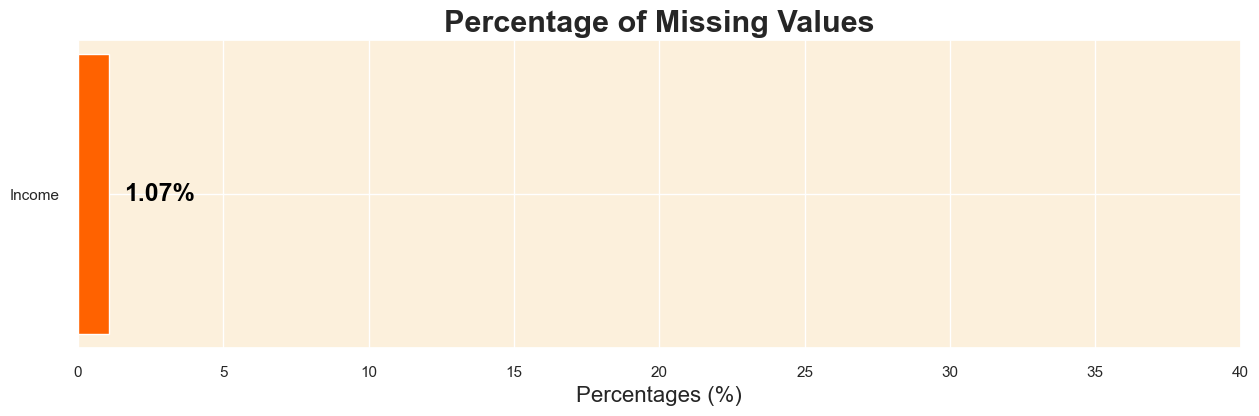

In [496]:
# Calculating the percentage of missing values for each column
missing_data = df.isnull().sum()
missing_percentage = (missing_data[missing_data > 0] / df.shape[0]) * 100

# Prepare values
missing_percentage.sort_values(ascending=True, inplace=True)

# Plot the barh chart
fig, ax = plt.subplots(figsize=(15, 4))
ax.barh(missing_percentage.index, missing_percentage, color='#ff6200')

# Annotate the values and indexes
for i, (value, name) in enumerate(zip(missing_percentage, missing_percentage.index)):
    ax.text(value+0.5, i, f"{value:.2f}%", ha='left', va='center', fontweight='bold', fontsize=18, color='black')

# Set x-axis limit
ax.set_xlim([0, 40])

# Add title and xlabel
plt.title("Percentage of Missing Values", fontweight='bold', fontsize=22)
plt.xlabel('Percentages (%)', fontsize=16)
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

<h3 align="left"><font color=#ff6200>Handling Missing Value Strategy:</font></h3>

- __`Income` (1.07% missing values)__
   - We can fill our nulls by educations mean .

       Let's go


In [497]:
# Group by 'Education' and calculate the mean of 'Income'
education_income_avg = df.groupby('Education')['Income'].mean()

# Fill null values in 'Income' with the corresponding education average
df['Income'] = df.apply(
    lambda row: education_income_avg[row['Education']] if pd.isnull(row['Income']) else row['Income'],
    axis=1
)


In [498]:
df['Income'].isnull().sum()

0

<a id="duplicates"></a>
# <b><span style='color:#fcc36d'>Step 3.2 |</span><span style='color:#ff6200'> Check Duplicates</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
Next, I am going to recognize duplicate rows in the dataset:

In [499]:
# Finding duplicate
duplicate_rows = df[df.duplicated(keep=False)]
duplicate_rows


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
Good, we do not have duplicates

<a id="Handling_outlier"></a>
# <b><span style='color:#fcc36d'>Step 3.3 |</span><span style='color:#ff6200'>Handling Outliers</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

- __`ID`__:

   - We can investigate and replace unreasonable values (like 0) with valid unique IDs or we remove these records if not critical to analysis.

- __`Year_Birth`__:

   - We can exclude or replace outliers such as 1893. Values can be filtered for a reasonable age range (18–100 years).

- __`Income`__: 
                                                                                                         
   - We can cap extreme outliers (max value of 666,666) using methods like winsorization or replace with a percentile threshold.

- __`Spending Columns (e.g., MntWines, MntFruits, etc.)`__:  
                                                                                                         
   - We can address skewed distributions by capping high outliers or applying log transformation for normalization.

- __`Purchasing Behavior Columns (e.g., NumDealsPurchases)`__:   
                                                                                 
   - We can handle customers with extremely high purchase counts by capping them or transforming the data.

<a id="Handling_outlier"></a>
# <b><span style='color:#fcc36d'>Step 3.3.1 |</span><span style='color:#ff6200'>  ID</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
<h3 align="left"><font color=#ff6200>Strategy: </font></h3>

- Step 1: Identify Unreasonable Values
- Step 2: Investigate Context
- Step 3: Replace or Remove Records
- Step 4: Verify and Document Changes

In [500]:
#Check for 0 values in the ID column
invalid_ids = df[df['ID'] == 0]

#Check how many IDs are unreasonable compared to the total dataset size
num_invalid = len(df[df['ID'] == 0])
#print(f"Number of invalid IDs: {num_invalid}")

#Investigate whether these rows are duplicates or if other columns contain errors.
duplicates = df[df.duplicated(subset='ID', keep=False)]

#Assign new IDs that do not conflict with existing ones.
max_id = df['ID'].max()
df.loc[df['ID'] == 0, 'ID'] = range(max_id + 1, max_id + 1 + num_invalid)


In [501]:
#Ensure no ID = 0 remains in the dataset.
df[df['ID'] == 0]


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


<a id="Handling_outlier"></a>
# <b><span style='color:#fcc36d'>Step 3.3.2 |</span><span style='color:#ff6200'>  Year Birth</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
<h3 align="left"><font color=#ff6200>Strategy: </font></h3>

- Step 1: Define the Reasonable Range
- Step 2: Identify Outliers
- Step 3: Handle Outliers
- Step 4: Verify Changes
- Step 5: Convert Year Birth to Ages


In [502]:
# Calculate the minimum and maximum valid birth years based on the current year.
# Minimum year: 2024 - 100 = 1924   customers at most 100 years old
# Maximum year: 2024 - 18 = 2006    customers at least 18 years old

# Use filtering to identify records where the Year_Birth column falls outside the defined range.
current_year = 2024
min_year = current_year - 100
max_year = current_year - 18

# Identify outliers
outliers = df[(df['Year_Birth'] < min_year) | (df['Year_Birth'] > max_year)]
outliers


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,26-09-2013,99,15,...,5,0,0,0,0,0,1,3,11,0
239,11004,1893,2n Cycle,Single,60182.0,0,1,17-05-2014,23,8,...,4,0,0,0,0,0,0,3,11,0
339,1150,1899,PhD,Together,83532.0,0,0,26-09-2013,36,755,...,1,0,0,1,0,0,0,3,11,0


In [503]:
# Define reasonable range for Year_Birth (e.g., 1924–2006)
reasonable_lower = 1924
reasonable_upper = 2006

# Identify outliers
outliers = (df["Year_Birth"] < reasonable_lower) | (df["Year_Birth"] > reasonable_upper)

# Calculate mean Year_Birth for each Education group
education_means = df.groupby("Education")["Year_Birth"].mean()

# Replace outliers with corresponding education group's mean
df.loc[outliers, "Year_Birth"] = df.loc[outliers, "Education"].map(education_means)

In [504]:
df['Year_Birth'].max()

1996.0

In [505]:
df['Year_Birth'].min()

1940.0

In [506]:
# Calculate current year
current_year = datetime.now().year

# Add 'Age' column
df['Age'] = current_year - df['Year_Birth']
# Drop the 'Year_Birth' column
df = df.drop(columns=['Year_Birth'])
df

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,0,0,0,0,0,0,3,11,1,67.0
1,2174,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,0,0,0,0,0,0,3,11,0,70.0
2,4141,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,0,0,0,0,0,0,3,11,0,59.0
3,6182,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,0,0,0,0,0,0,3,11,0,40.0
4,5324,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,0,0,0,0,0,0,3,11,0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,...,0,0,0,0,0,0,3,11,0,57.0
2236,4001,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,...,0,0,0,1,0,0,3,11,0,78.0
2237,7270,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,...,0,1,0,0,0,0,3,11,0,43.0
2238,8235,Master,Together,69245.0,0,1,24-01-2014,8,428,30,...,0,0,0,0,0,0,3,11,0,68.0


<a id="Handling_outlier"></a>
# <b><span style='color:#fcc36d'>Step 3.3.3 |</span><span style='color:#ff6200'>  Income</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
We can use Winsorization : Winsorization limits extreme values to a specified percentile range, ensuring no value is beyond a certain threshold.

In [507]:
# Apply Winsorization to cap the top 5% of values
df["Income"] = winsorize(df["Income"], limits=(0, 0.05))  # Capping only the top 5%

# Verify the results
print(df["Income"].describe())

count     2240.00000
mean     51486.44684
std      20150.82989
min       1730.00000
25%      35538.75000
50%      51609.50000
75%      68289.75000
max      83917.00000
Name: Income, dtype: float64


<a id="Handling_outlier"></a>
# <b><span style='color:#fcc36d'>Step 3.3.4 |</span><span style='color:#ff6200'>  Spending Columns (e.g., MntWines, MntFruits, etc.)</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

We can use Log Transformation

In [508]:
# List of columns to apply log transformation
columns_to_transform = [
    "MntWines", 
    "MntFruits", 
    "MntMeatProducts", 
    "MntFishProducts", 
    "MntSweetProducts", 
    "MntGoldProds"
]

# Apply log transformation to each column
for column in columns_to_transform:
    df[column] = np.log1p(df[column])  # log1p handles log(0) by adding 1 internally

# Check the transformed columns
print(df[columns_to_transform].head())

   MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0  6.455199   4.488636         6.304449         5.153292          4.488636   
1  2.484907   0.693147         1.945910         1.098612          0.693147   
2  6.056784   3.912023         4.852030         4.718499          3.091042   
3  2.484907   1.609438         3.044522         2.397895          1.386294   
4  5.159055   3.784190         4.779123         3.850148          3.332205   

   MntGoldProds  
0      4.488636  
1      1.945910  
2      3.761200  
3      1.791759  
4      2.772589  


<a id="Handling_outlier"></a>
# <b><span style='color:#fcc36d'>Step 3.3.5 |</span><span style='color:#ff6200'>  Purchasing Behavior Columns (e.g., NumDealsPurchases)</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
<h3 align="left"><font color=#ff6200>Strategy: </font></h3>

- Step 1: Specify Columns to Handle

NumDealsPurchases,
NumWebPurchases,
NumCatalogPurchases,
NumStorePurchases,
NumWebVisitsMonth

- Step 2: Explore the Data
- Step 3: Handle Outliers
- Step 4: Verify Results



In [509]:
# We can use .describe() to understand the distribution and identify potential outliers
df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']].describe()


,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,2.325000,4.084821,2.662054,5.790179,5.316518
std,1.932238,2.778714,2.923101,3.250958,2.426645
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,0.000000,3.000000,3.000000
50%,2.000000,4.000000,2.000000,5.000000,6.000000
75%,3.000000,6.000000,4.000000,8.000000,7.000000
max,15.000000,27.000000,28.000000,13.000000,20.000000


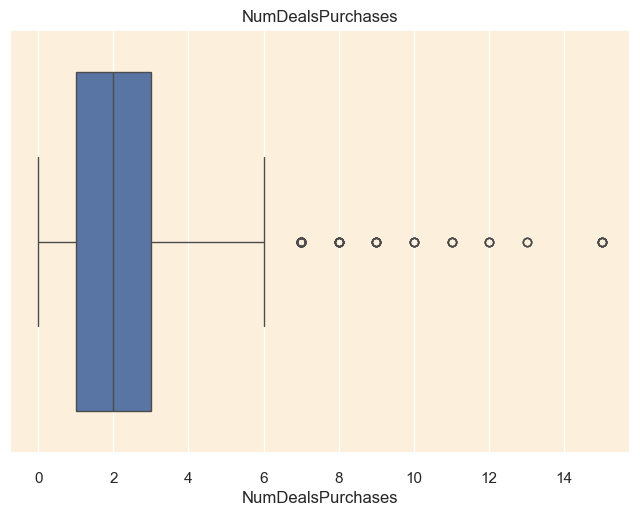

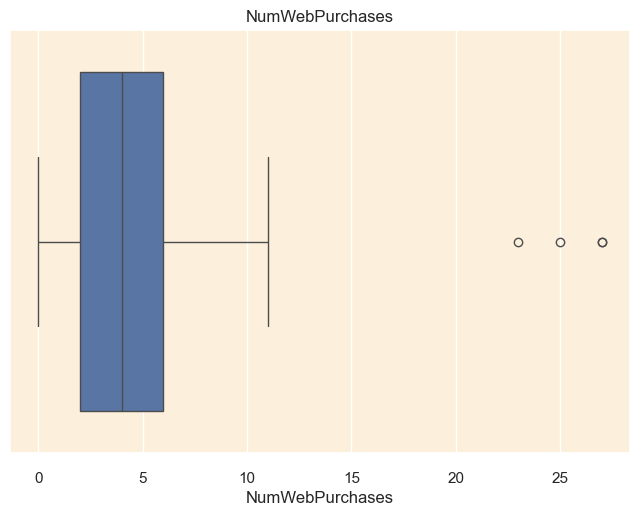

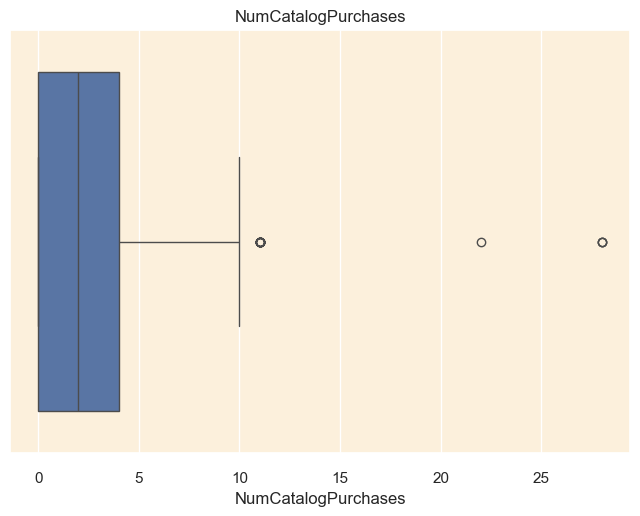

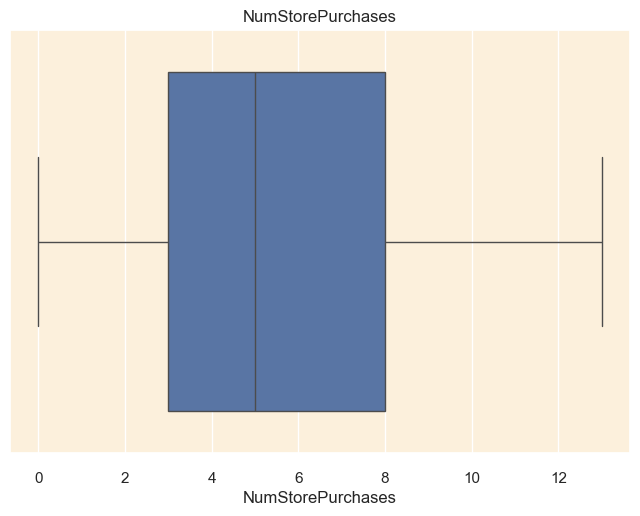

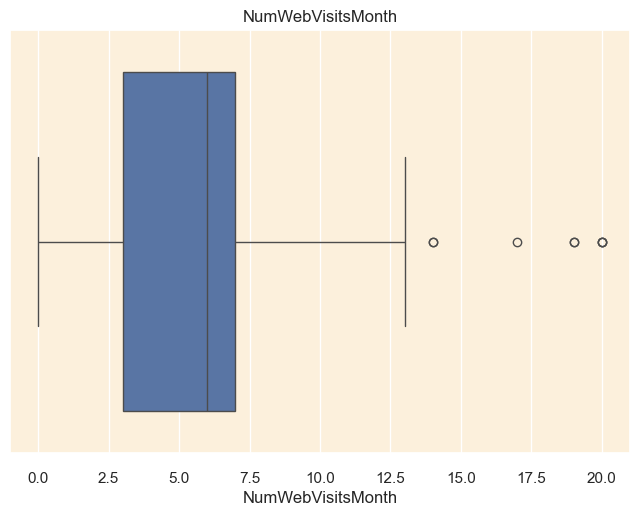

In [510]:
# We can use boxplots or histograms to visualize skewness or outliers
for col in ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']:
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()


In [511]:
# We can define a threshold for each column based on percentiles (e.g., 95th percentile):
# Calculate the 95th percentile for each column
thresholds = df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']].quantile(0.95)

# Cap values at the 95th percentile
for col in thresholds.index:
    df[col] = df[col].apply(lambda x: min(x, thresholds[col]))


In [512]:
# Log transform each column (add 1 to avoid log(0))
for col in ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']:
    df[col + '_log'] = np.log1p(df[col])

In [513]:
# Check Summary Statistics Again
df[['NumDealsPurchases', 'NumDealsPurchases_log', 'NumWebPurchases', 'NumWebPurchases_log']].describe()


,NumDealsPurchases,NumDealsPurchases_log,NumWebPurchases,NumWebPurchases_log
count,2240.000000,2240.000000,2240.000000,2240.000000
mean,2.215625,1.066406,3.996875,1.470246
std,1.538671,0.441919,2.501895,0.548887
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.693147,2.000000,1.098612
50%,2.000000,1.098612,4.000000,1.609438
75%,3.000000,1.386294,6.000000,1.945910
max,6.000000,1.945910,9.000000,2.302585


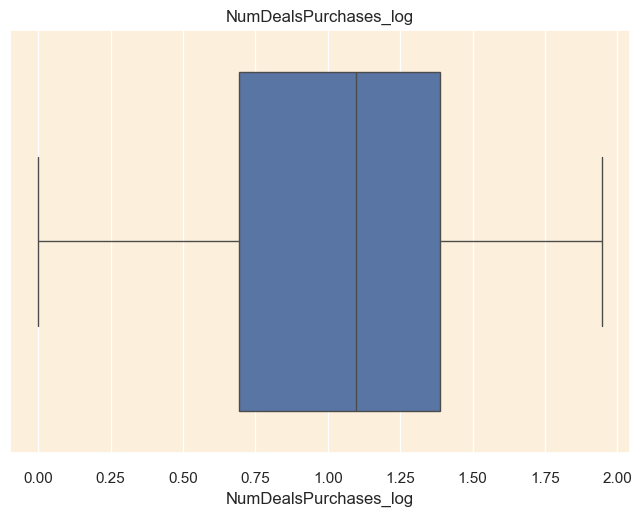

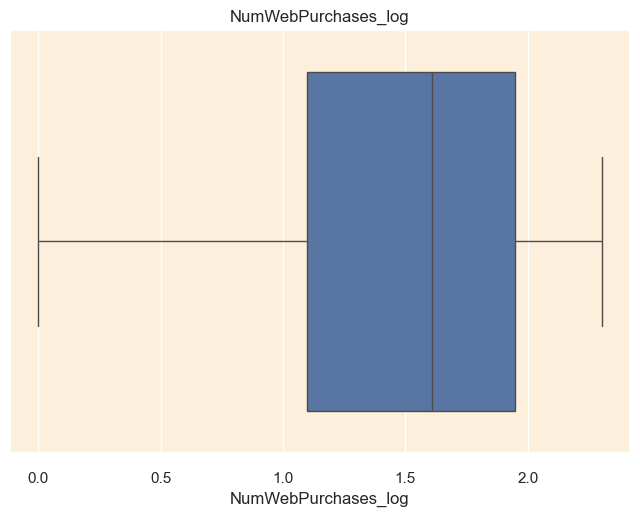

In [514]:
# Visualize Adjusted Data: Re-run the boxplots or histograms to confirm the changes:
for col in ['NumDealsPurchases_log', 'NumWebPurchases_log']:
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()


<a id="feature_engineering"></a>
# <p style="background-color: #ff6200; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 4 | Feature Engineering</p>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

In order to create a comprehensive customer-centric dataset for clustering and recommendation, the following features can be engineered from the available data:

<a id="rfm_features"></a>
# <b><span style='color:#fcc36d'>Step 4.1 |</span><span style='color:#ff6200'> RFM Features</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

RFM is a method used for analyzing customer value and segmenting the customer base. It is an acronym that stands for:

- __Recency (R):__ This metric indicates how recently a customer has made a purchase. A lower recency value means the customer has purchased more recently, indicating higher engagement with the brand.

    
- __Frequency (F):__ This metric signifies how often a customer makes a purchase within a certain period. A higher frequency value indicates a customer who interacts with the business more often, suggesting higher loyalty or satisfaction.

    
- __Monetary (M):__ This metric represents the total amount of money a customer has spent over a certain period. Customers who have a higher monetary value have contributed more to the business, indicating their potential high lifetime value.

    
Together, these metrics help in understanding a customer's buying behavior and preferences, which is pivotal in personalizing marketing strategies and creating a recommendation system.

<a id="recency"></a>
## <b><span style='color:#fcc36d'>Step 4.1.1 |</span><span style='color:#ff6200'> Recency (R)</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
In this step, we focus on understanding how recently a customer has made a purchase. This is a crucial aspect of customer segmentation as it helps in identifying the engagement level of customers. Here, I am going to define the following feature:

- __Recency__: This feature represents the number of days that have passed since the customer's last purchase. A lower value indicates that the customer has purchased recently, implying a higher engagement level with the business, whereas a higher value may indicate a lapse or decreased engagement. By understanding the recency of purchases, businesses can tailor their marketing strategies to re-engage customers who have not made purchases in a while, potentially increasing customer retention and fostering loyalty.

In [515]:
df.head(2)

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,Complain,Z_CostContact,Z_Revenue,Response,Age,NumDealsPurchases_log,NumWebPurchases_log,NumCatalogPurchases_log,NumStorePurchases_log,NumWebVisitsMonth_log
0,5524,Graduation,Single,58138.0,0,0,04-09-2012,58,6.455199,4.488636,...,0,3,11,1,67.0,1.386294,2.197225,2.302585,1.609438,2.079442
1,2174,Graduation,Single,46344.0,1,1,08-03-2014,38,2.484907,0.693147,...,0,3,11,0,70.0,1.098612,0.693147,0.693147,1.098612,1.791759


In [516]:
# Extract only the ID and Recency columns
Customer_data = df[['ID', 'Recency']]
Customer_data

,ID,Recency
0,5524,58
1,2174,38
2,4141,26
3,6182,26
4,5324,94
...,...,...
2235,10870,46
2236,4001,56
2237,7270,91
2238,8235,8


<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
<h3 align="left"><font color=#ff6200>Note: </font></h3>
    
- I've named the customer-centric dataframe as __customer_data__, which will eventually contain all the customer-based features we plan to create.

<a id="frequency"></a>
## <b><span style='color:#fcc36d'>Step 4.1.2 |</span><span style='color:#ff6200'> Frequency (F)</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

To calculate the Frequency (F) metric, we need to determine how often each customer has engaged with the retailer (e.g., made purchases). In the given dataset, the frequency can be derived from columns that reflect purchase counts or logs of purchases. Based on your dataset structure, we can aggregate relevant columns to calculate the total frequency of interactions for each customer.

In [517]:
# Calculate Frequency (F) by summing up relevant columns
df['Frequency'] = (
    df['NumDealsPurchases_log'] + 
    df['NumWebPurchases_log'] + 
    df['NumCatalogPurchases_log'] + 
    df['NumStorePurchases_log']
)

# Create a new DataFrame with ID and Frequency
customer_data = df[['ID', 'Recency', 'Frequency']]
customer_data

,ID,Recency,Frequency
0,5524,58,7.495542
1,2174,38,3.583519
2,4141,26,6.386879
3,6182,26,3.806662
4,5324,94,6.915723
...,...,...,...
2235,10870,46,6.396930
2236,4001,56,7.033506
2237,7270,91,5.743003
2238,8235,8,7.234177


<a id="monetary"></a>
## <b><span style='color:#fcc36d'>Step 4.1.3 |</span><span style='color:#ff6200'> Monetary (M)</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

To calculate the Monetary (M) value , we need to determine the total monetary value of purchases made by each customer. This is typically calculated as the sum of spending across various product categories.

In [518]:
# Calculate Monetary (M) by summing up the relevant columns
df['Monetary'] = (
    df['MntWines'] +
    df['MntFruits'] +
    df['MntMeatProducts'] +
    df['MntFishProducts'] +
    df['MntSweetProducts'] +
    df['MntGoldProds']
)

# Create a new DataFrame containing ID and Monetary
customer_data = df[['ID', 'Recency', 'Frequency', 'Monetary']]
customer_data

,ID,Recency,Frequency,Monetary
0,5524,58,7.495542,31.378848
1,2174,38,3.583519,8.861634
2,4141,26,6.386879,26.391579
3,6182,26,3.806662,12.714816
4,5324,94,6.915723,23.677309
...,...,...,...,...
2235,10870,46,6.396930,29.612693
2236,4001,56,7.033506,11.640025
2237,7270,91,5.743003,25.368993
2238,8235,8,7.234177,26.821653


<a id="behaviroal_features"></a>
# <b><span style='color:#fcc36d'>Step 4.2 |</span><span style='color:#ff6200'> Behavioral Features</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

In this step, we aim to understand and capture the shopping patterns and behaviors of customers. These features will give us insights into the customers' preferences regarding when they like to shop, which can be crucial information for personalizing their shopping experience. Here are the features I am planning to introduce:

- __Average Days Between Purchases__: This feature represents the average number of days a customer waits before making another purchase. Understanding this can help in predicting when the customer is likely to make their next purchase, which can be a crucial metric for targeted marketing and personalized promotions.
    


In [519]:
# Convert Dt_Customer to datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

# Calculate active days
df['Active_Days'] = (datetime.now() - df['Dt_Customer']).dt.days

# Calculate total purchases (sum of all purchase-related columns)
df['Total_Purchases'] = (df['NumDealsPurchases'] + df['NumWebPurchases'] +
                         df['NumCatalogPurchases'] + df['NumStorePurchases'])

# Calculate average days between purchases
df['Avg_Days_Between_Purchases'] = df['Active_Days'] / df['Total_Purchases']
customer_data = df[['ID', 'Recency', 'Frequency', 'Monetary','Avg_Days_Between_Purchases']]
customer_data

,ID,Recency,Frequency,Monetary,Avg_Days_Between_Purchases
0,5524,58,7.495542,31.378848,187.458333
1,2174,38,3.583519,8.861634,658.166667
2,4141,26,6.386879,26.391579,197.523810
3,6182,26,3.806662,12.714816,496.875000
4,5324,94,6.915723,23.677309,210.368421
...,...,...,...,...,...
2235,10870,46,6.396930,29.612693,234.277778
2236,4001,56,7.033506,11.640025,183.571429
2237,7270,91,5.743003,25.368993,221.722222
2238,8235,8,7.234177,26.821653,173.565217


<a id="behaviroal_features"></a>
# <b><span style='color:#fcc36d'>Step 4.3 |</span><span style='color:#ff6200'> Encode Categorical Data</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

- __`Education`__ And  __`Marital_Status`__:

  - we need convert to binary.

In [520]:
# Create a binary column for Graduation
df['Education_Graduation'] = df['Education'].apply(lambda x: 1 if x == 'Graduation' else 0)
# Create a binary column for Married
df['Marital_Status_Married'] = df['Marital_Status'].apply(lambda x: 1 if x == 'Married' else 0)
# add to customer_data
customer_data = df[['ID', 'Recency', 'Frequency', 'Monetary','Avg_Days_Between_Purchases','Education_Graduation','Marital_Status_Married']]
customer_data

,ID,Recency,Frequency,Monetary,Avg_Days_Between_Purchases,Education_Graduation,Marital_Status_Married
0,5524,58,7.495542,31.378848,187.458333,1,0
1,2174,38,3.583519,8.861634,658.166667,1,0
2,4141,26,6.386879,26.391579,197.523810,1,0
3,6182,26,3.806662,12.714816,496.875000,1,0
4,5324,94,6.915723,23.677309,210.368421,0,1
...,...,...,...,...,...,...,...
2235,10870,46,6.396930,29.612693,234.277778,1,1
2236,4001,56,7.033506,11.640025,183.571429,0,0
2237,7270,91,5.743003,25.368993,221.722222,1,0
2238,8235,8,7.234177,26.821653,173.565217,0,0


<a id="behaviroal_features"></a>
# <b><span style='color:#fcc36d'>Step 4.4 |</span><span style='color:#ff6200'> Merge</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

We want merge __`Kidhome`__  and __`Teenhome`__  by create a new column that represents the total number of children (both young children and teenagers) in the household

In [521]:
# Merge Kidhome and Teenhome into a new column called 'TotalChildren'
df['TotalChildren'] = df['Kidhome'] + df['Teenhome']
# add to customer_data
customer_data = df[['ID', 'Recency', 'Frequency', 'Monetary','Avg_Days_Between_Purchases','Education_Graduation','Marital_Status_Married','TotalChildren']]
customer_data

,ID,Recency,Frequency,Monetary,Avg_Days_Between_Purchases,Education_Graduation,Marital_Status_Married,TotalChildren
0,5524,58,7.495542,31.378848,187.458333,1,0,0
1,2174,38,3.583519,8.861634,658.166667,1,0,2
2,4141,26,6.386879,26.391579,197.523810,1,0,0
3,6182,26,3.806662,12.714816,496.875000,1,0,1
4,5324,94,6.915723,23.677309,210.368421,0,1,1
...,...,...,...,...,...,...,...,...
2235,10870,46,6.396930,29.612693,234.277778,1,1,1
2236,4001,56,7.033506,11.640025,183.571429,0,0,3
2237,7270,91,5.743003,25.368993,221.722222,1,0,0
2238,8235,8,7.234177,26.821653,173.565217,0,0,1


<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

Also , we want add __`Income`__ and  __`Complain`__  and __`Response`__ and __`Age`__ to customer_data.

In [522]:
customer_data = df[['ID', 'Recency', 'Frequency', 'Monetary','Avg_Days_Between_Purchases','Education_Graduation','Marital_Status_Married','TotalChildren','Income','Complain','Response','Age']]
customer_data

,ID,Recency,Frequency,Monetary,Avg_Days_Between_Purchases,Education_Graduation,Marital_Status_Married,TotalChildren,Income,Complain,Response,Age
0,5524,58,7.495542,31.378848,187.458333,1,0,0,58138.0,0,1,67.0
1,2174,38,3.583519,8.861634,658.166667,1,0,2,46344.0,0,0,70.0
2,4141,26,6.386879,26.391579,197.523810,1,0,0,71613.0,0,0,59.0
3,6182,26,3.806662,12.714816,496.875000,1,0,1,26646.0,0,0,40.0
4,5324,94,6.915723,23.677309,210.368421,0,1,1,58293.0,0,0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,46,6.396930,29.612693,234.277778,1,1,1,61223.0,0,0,57.0
2236,4001,56,7.033506,11.640025,183.571429,0,0,3,64014.0,0,0,78.0
2237,7270,91,5.743003,25.368993,221.722222,1,0,0,56981.0,0,0,43.0
2238,8235,8,7.234177,26.821653,173.565217,0,0,1,69245.0,0,0,68.0


<a id="seasonality_trends"></a>
# <b><span style='color:#fcc36d'>Step 4.5 |</span><span style='color:#ff6200'> Derived Features</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

In this step we will derived features to help our segmentation :

- __`Lifetime Value (LTV)`__ 
  - We will calculate an estimated lifetime value for each customer using their Monetary value and Frequency, by this formula LTV=Monetary×Frequency. This helps identify high-value customers.

- __`Spending per Day`__
  - We will divide Monetary by Avg_Days_Between_Purchases to estimate daily spending, by this formula Spending per Day= Monetary/Avg_Days_Between_Purchases

- __`Loyalty Indicator`__
  - We will categorize customers based on Recency.

- __`Engagement Level`__ 
  - We will use Recency and Frequency to create an engagement score. 
​
- __`Spending to Income Ratio`__ 
  - We will divide Monetary by Income to assess how much customers spend relative to their income, by this formula Spending to Income Ratio=Monetary/Income

- __`Household Size`__ 
  - We will combine TotalChildren with Marital_Status_Married to estimate family size, by this formula Household Size=TotalChildren+(Marital_Status_Married×2)

- __`Loyalty Index`__ 
  - We will combine Response and Frequency to determine loyalty. Higher responses and frequent purchases indicate loyalty.

- __`Loyalty Index`__ 
  - We will categorize customers into age groups (e.g., Young Adults: 18-35, Middle-aged: 36-60, Seniors: 61+).



In [523]:
# Calculate LTV
df["LTV"] = df["Frequency"] * df["Monetary"]

# Calculate Spending per Day
df["Spending_per_Day"] = df["Monetary"] / df["Avg_Days_Between_Purchases"]

# Categorize customers based on Recency
def categorize_recency(recency):
    if recency <= 30:
        return "Active"
    elif 30 < recency <= 90:
        return "At-Risk"
    else:
        return "Inactive"

df["Recency_Category"] = df["Recency"].apply(categorize_recency)

# Calculate Engagement Score
df["Engagement_Score"] = df["Recency"] / df["Frequency"]

# Calculate Spending to Income Ratio
df["Spending_to_Income_Ratio"] = df["Monetary"] / df["Income"]

# Calculate Household Size
df["Household_Size"] = df["TotalChildren"] + (df["Marital_Status_Married"] * 2)

# Calculate Loyalty
df["Loyalty"] = df["Response"] * df["Frequency"]

# Function to categorize customers based on age
def categorize_age(age):
    if 18 <= age <= 35:
        return 'Young Adults'
    elif 36 <= age <= 60:
        return 'Middle-aged'
    elif age >= 61:
        return 'Seniors'
    else:
        return 'Unknown'

# Apply the function to the 'Age' column
df['Age_Group'] = df['Age'].apply(categorize_age)

# Add all new features to customer_data
customer_data = df[['ID', 'Recency', 'Frequency', 'Monetary','Avg_Days_Between_Purchases','Education_Graduation','Marital_Status_Married','TotalChildren','Income','Complain','Response','Age',"LTV","Spending_per_Day","Recency_Category","Engagement_Score","Spending_to_Income_Ratio","Household_Size","Loyalty",'Age_Group']]
customer_data.head()

,ID,Recency,Frequency,Monetary,Avg_Days_Between_Purchases,Education_Graduation,Marital_Status_Married,TotalChildren,Income,Complain,Response,Age,LTV,Spending_per_Day,Recency_Category,Engagement_Score,Spending_to_Income_Ratio,Household_Size,Loyalty,Age_Group
0,5524,58,7.495542,31.378848,187.458333,1,0,0,58138.0,0,1,67.0,235.201472,0.167391,At-Risk,7.737933,0.000540,0,7.495542,Seniors
1,2174,38,3.583519,8.861634,658.166667,1,0,2,46344.0,0,0,70.0,31.755832,0.013464,At-Risk,10.604102,0.000191,2,0.000000,Seniors
2,4141,26,6.386879,26.391579,197.523810,1,0,0,71613.0,0,0,59.0,168.559828,0.133612,Active,4.070846,0.000369,0,0.000000,Middle-aged
3,6182,26,3.806662,12.714816,496.875000,1,0,1,26646.0,0,0,40.0,48.401014,0.025590,Active,6.830130,0.000477,1,0.000000,Middle-aged
4,5324,94,6.915723,23.677309,210.368421,0,1,1,58293.0,0,0,43.0,163.745723,0.112552,Inactive,13.592215,0.000406,3,0.000000,Middle-aged


<a id="seasonality_trends"></a>
# <b><span style='color:#fcc36d'>Step 4.6 |</span><span style='color:#ff6200'> Features that can be dropped</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

In [524]:
# Drop the specified columns
columns_to_drop = ['Complain', 'Response', 'Age', 'Education_Graduation', 'Marital_Status_Married']
customer_data = customer_data.drop(columns=columns_to_drop)
customer_data.head()

,ID,Recency,Frequency,Monetary,Avg_Days_Between_Purchases,TotalChildren,Income,LTV,Spending_per_Day,Recency_Category,Engagement_Score,Spending_to_Income_Ratio,Household_Size,Loyalty,Age_Group
0,5524,58,7.495542,31.378848,187.458333,0,58138.0,235.201472,0.167391,At-Risk,7.737933,0.000540,0,7.495542,Seniors
1,2174,38,3.583519,8.861634,658.166667,2,46344.0,31.755832,0.013464,At-Risk,10.604102,0.000191,2,0.000000,Seniors
2,4141,26,6.386879,26.391579,197.523810,0,71613.0,168.559828,0.133612,Active,4.070846,0.000369,0,0.000000,Middle-aged
3,6182,26,3.806662,12.714816,496.875000,1,26646.0,48.401014,0.025590,Active,6.830130,0.000477,1,0.000000,Middle-aged
4,5324,94,6.915723,23.677309,210.368421,1,58293.0,163.745723,0.112552,Inactive,13.592215,0.000406,3,0.000000,Middle-aged


<a id="seasonality_trends"></a>
# <b><span style='color:#fcc36d'>Step 4.7 |</span><span style='color:#ff6200'> Convert features to binary</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

- The Recency_Category column will have numeric values like:

  -Active → 1
  -At-Risk → 2
  -Inactive → 3

- The Age_Group column will have numeric values like:

  -Young Adults → 1
  -Middle-aged → 2
  -Seniors → 3

In [525]:
# Assign numeric values to categories
customer_data['Recency_Category'] = pd.Categorical(customer_data['Recency_Category']).codes + 1
customer_data['Age_Group'] = pd.Categorical(customer_data['Age_Group']).codes + 1

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

We've done a great job so far! We have created a dataset that focuses on our customers, using a variety of new features that give us a deeper understanding of their buying patterns and preferences.

In [526]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          2240 non-null   int64  
 1   Recency                     2240 non-null   int64  
 2   Frequency                   2240 non-null   float64
 3   Monetary                    2240 non-null   float64
 4   Avg_Days_Between_Purchases  2240 non-null   float64
 5   TotalChildren               2240 non-null   int64  
 6   Income                      2240 non-null   float64
 7   LTV                         2240 non-null   float64
 8   Spending_per_Day            2240 non-null   float64
 9   Recency_Category            2240 non-null   int8   
 10  Engagement_Score            2240 non-null   float64
 11  Spending_to_Income_Ratio    2240 non-null   float64
 12  Household_Size              2240 non-null   int64  
 13  Loyalty                     2240 

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
Let's review the descriptions of the columns in our newly created `customer_data` dataset:

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:130%; text-align:left">

<h2 align="left"><font color=#ff6200>Customer Dataset Description:</font></h2>

| __Variable__                       | __Description__ |
|     :---                           |       :---      |
| __ID__                     | Identifier uniquely assigned to each customer, used to distinguish individual customers. |
| __Recency__                     | Number of days since the customer's last purchase. |
| __Frequency__                     | Total number of purchases made by the customer. |
| __Monetary__                     | Total monetary value spent by the customer. |
| __Avg_Days_Between_Purchases__                     | Average number of days between the customer's purchases. |
| __TotalChildren__                     | Total number of children in the customer's household. |
| __Income__                     | Annual income of the customer. |
| __LTV__                     | Lifetime Value, calculated as Monetary × Frequency. |
| __Spending_per_Day__                     | Estimated daily spending, calculated as Monetary ÷ Avg_Days_Between_Purchases. |
| __Recency_Category__                     | Categorization of customers based on recency: Active, At-Risk, or Inactive. |
| __Engagement_Score__                     | Engagement score based on Recency and Frequency. |
| __Spending_to_Income_Ratio__                     | Ratio of customer's spending relative to their income, calculated as Monetary ÷ Income. |
| __Household_Size__                     | Estimated size of the customer's household, calculated as TotalChildren + (Marital_Status_Married × 2). |
| __Loyalty__                     | Loyalty score based on the customer's Response and Frequency. |
| __Age_Group__                     | Categorization of customers into age groups: Young Adults (18-35), Middle-aged (36-60), and Seniors (61+). |

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

We've done a great job so far! We have created a dataset that focuses on our customers, using a variety of new features that give us a deeper understanding of their buying patterns and preferences.

Now that our dataset is ready, we can move on to the next steps of our project. This includes looking at our data more closely to find any patterns or trends, making sure our data is in the best shape by checking for and handling any outliers, and preparing our data for the clustering process. All of these steps will help us build a strong foundation for creating our customer segments and, eventually, a personalized recommendation system.

<h3 align="left"><font color=#ff6200>Let's dive in!</font></h3>

<a id="outlier_detection"></a>
# <p style="background-color: #ff6200; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 5 | Outlier Detection and Treatment</p>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

In this section, I will identify and handle outliers in our dataset. Outliers are data points that are significantly different from the majority of other points in the dataset. These points can potentially skew the results of our analysis, especially in k-means clustering where they can significantly influence the position of the cluster centroids. Therefore, it is essential to identify and treat these outliers appropriately to achieve more accurate and meaningful clustering results.

Given the multi-dimensional nature of the data, it would be prudent to use algorithms that can detect outliers in multi-dimensional spaces. I am going to use the __Isolation Forest__ algorithm for this task. This algorithm works well for multi-dimensional data and is computationally efficient. It isolates observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.

Let's proceed with this approach:

In [527]:
# Drop ID column
features = customer_data.drop(columns=['ID'])

# Replace infinities and fill NaNs
features.replace([float('inf'), float('-inf')], float('nan'), inplace=True)
features.fillna(features.mean(), inplace=True)

# Normalize the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Initialize Isolation Forest
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)

# Fit the model
iso_forest.fit(features_scaled)

# Predict outliers
customer_data['Outlier'] = iso_forest.predict(features_scaled)
customer_data.head()

,ID,Recency,Frequency,Monetary,Avg_Days_Between_Purchases,TotalChildren,Income,LTV,Spending_per_Day,Recency_Category,Engagement_Score,Spending_to_Income_Ratio,Household_Size,Loyalty,Age_Group,Outlier
0,5524,58,7.495542,31.378848,187.458333,0,58138.0,235.201472,0.167391,2,7.737933,0.000540,0,7.495542,2,-1
1,2174,38,3.583519,8.861634,658.166667,2,46344.0,31.755832,0.013464,2,10.604102,0.000191,2,0.000000,2,1
2,4141,26,6.386879,26.391579,197.523810,0,71613.0,168.559828,0.133612,1,4.070846,0.000369,0,0.000000,1,1
3,6182,26,3.806662,12.714816,496.875000,1,26646.0,48.401014,0.025590,1,6.830130,0.000477,1,0.000000,1,1
4,5324,94,6.915723,23.677309,210.368421,1,58293.0,163.745723,0.112552,3,13.592215,0.000406,3,0.000000,1,1


<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
After applying the Isolation Forest algorithm, we have identified the outliers and marked them in a new column named `Is_Outlier`. We have also calculated the outlier scores which represent the anomaly score of each record. 

Now let's visualize the distribution of these scores and the number of inliers and outliers detected by the model:

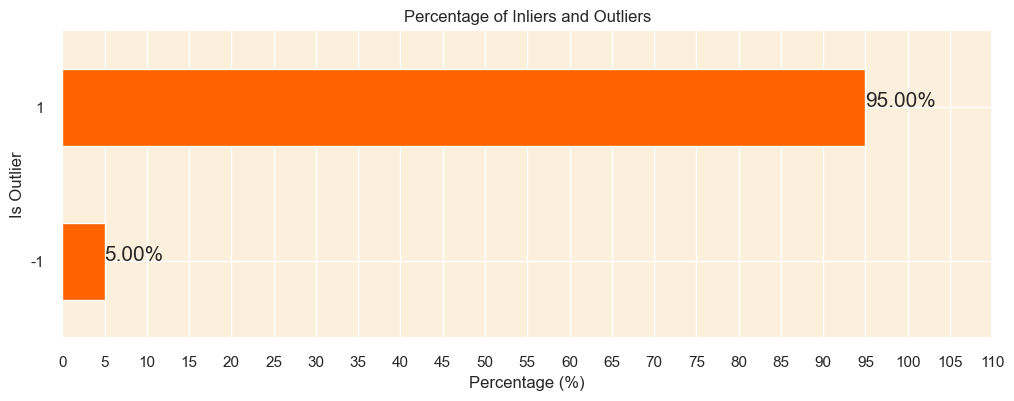

In [528]:
# Calculate the percentage of inliers and outliers
outlier_percentage = customer_data['Outlier'].value_counts(normalize=True) * 100

# Plotting the percentage of inliers and outliers
plt.figure(figsize=(12, 4))
outlier_percentage.plot(kind='barh', color='#ff6200')

# Adding the percentage labels on the bars
for index, value in enumerate(outlier_percentage):
    plt.text(value, index, f'{value:.2f}%', fontsize=15)

plt.title('Percentage of Inliers and Outliers')
plt.xticks(ticks=np.arange(0, 115, 5))
plt.xlabel('Percentage (%)')
plt.ylabel('Is Outlier')
plt.gca().invert_yaxis()
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
<h3 align="left"><font color=#ff6200>Inference: </font></h3>
    
From the above plot, we can observe that about 5% of the customers have been identified as outliers in our dataset. This percentage seems to be a reasonable proportion, not too high to lose a significant amount of data, and not too low to retain potentially noisy data points. It suggests that our isolation forest algorithm has worked well in identifying a moderate percentage of outliers, which will be critical in refining our customer segmentation.

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
<h3 align="left"><font color=#ff6200>Strategy: </font></h3>

Considering the nature of the project (customer segmentation using clustering), it is crucial to handle these outliers to prevent them from affecting the clusters' quality significantly. Therefore, I will separate these outliers for further analysis and remove them from our main dataset to prepare it for the clustering analysis. 

Let's proceed with the following steps:

- Separate the identified outliers for further analysis and save them as a separate file (optional).
- Remove the outliers from the main dataset to prevent them from influencing the clustering process.
- Drop the `Outlier` column as it was auxiliary column used for the outlier detection process.

Let's implement these steps:

In [529]:
customer_data

,ID,Recency,Frequency,Monetary,Avg_Days_Between_Purchases,TotalChildren,Income,LTV,Spending_per_Day,Recency_Category,Engagement_Score,Spending_to_Income_Ratio,Household_Size,Loyalty,Age_Group,Outlier
0,5524,58,7.495542,31.378848,187.458333,0,58138.0,235.201472,0.167391,2,7.737933,0.000540,0,7.495542,2,-1
1,2174,38,3.583519,8.861634,658.166667,2,46344.0,31.755832,0.013464,2,10.604102,0.000191,2,0.000000,2,1
2,4141,26,6.386879,26.391579,197.523810,0,71613.0,168.559828,0.133612,1,4.070846,0.000369,0,0.000000,1,1
3,6182,26,3.806662,12.714816,496.875000,1,26646.0,48.401014,0.025590,1,6.830130,0.000477,1,0.000000,1,1
4,5324,94,6.915723,23.677309,210.368421,1,58293.0,163.745723,0.112552,3,13.592215,0.000406,3,0.000000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,46,6.396930,29.612693,234.277778,1,61223.0,189.430315,0.126400,2,7.190950,0.000484,3,0.000000,1,1
2236,4001,56,7.033506,11.640025,183.571429,3,64014.0,81.870191,0.063409,2,7.961889,0.000182,3,0.000000,2,1
2237,7270,91,5.743003,25.368993,221.722222,0,56981.0,145.694209,0.114418,3,15.845368,0.000445,0,0.000000,1,1
2238,8235,8,7.234177,26.821653,173.565217,1,69245.0,194.032589,0.154534,1,1.105862,0.000387,1,0.000000,2,1


In [530]:
# Remove the outliers from the main dataset
customer_data_cleaned = customer_data[customer_data['Outlier'] == 1]  # Keep only rows where 'Outlier' is 1

# Drop the 'Outlier' column as it was used for outlier detection
customer_data_cleaned = customer_data_cleaned.drop(columns=['Outlier'])

In [531]:
customer_data_cleaned.shape[0]

2128

<a id="correlation"></a>
# <p style="background-color: #ff6200; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 6 | Correlation Analysis</p>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

Before we proceed to KMeans clustering, it's essential to check the correlation between features in our dataset. The presence of __multicollinearity__, where __features are highly correlated__, can potentially affect the clustering process by not allowing the model to learn the actual underlying patterns in the data, as the features do not provide unique information. This could lead to clusters that are not well-separated and meaningful.

If we identify multicollinearity, we can utilize dimensionality reduction techniques like PCA. These techniques help in neutralizing the effect of multicollinearity by transforming the correlated features into a new set of uncorrelated variables, preserving most of the original data's variance. This step not only enhances the quality of clusters formed but also makes the clustering process more computationally efficient.

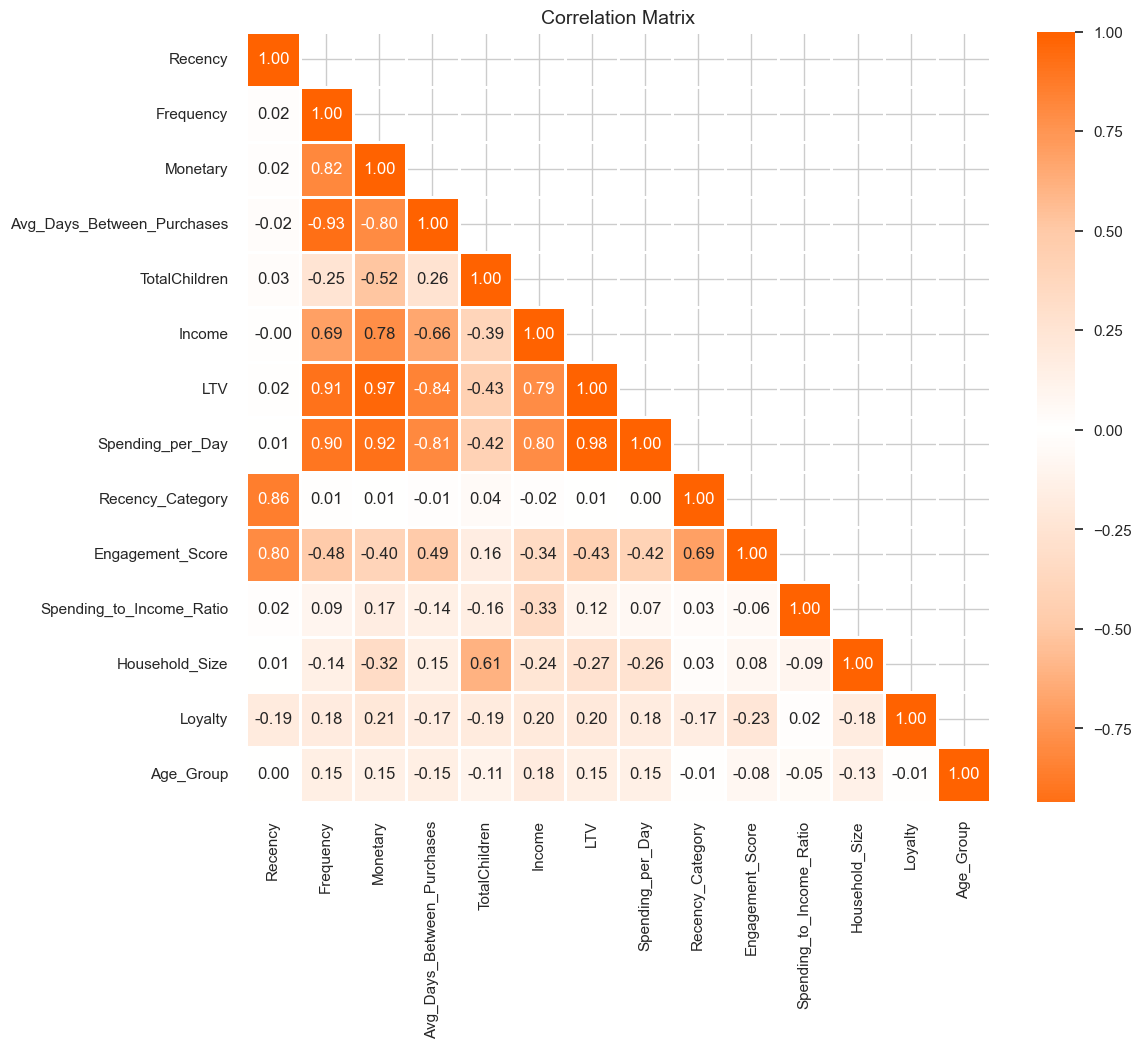

In [532]:
# Reset background style
sns.set_style('whitegrid')

# Calculate the correlation matrix excluding the 'CustomerID' column
corr = customer_data_cleaned.drop(columns=['ID']).corr()

# Define a custom colormap
colors = ['#ff6200', '#ffcaa8', 'white', '#ffcaa8', '#ff6200']
my_cmap = LinearSegmentedColormap.from_list('custom_map', colors, N=256)

# Create a mask to only show the lower triangle of the matrix (since it's mirrored around its 
# top-left to bottom-right diagonal)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, k=1)] = True

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, mask=mask, cmap=my_cmap, annot=True, center=0, fmt='.2f', linewidths=2)
plt.title('Correlation Matrix', fontsize=14)
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
<h3 align="left"><font color=#ff6200>Inference: </font></h3>

Looking at the heatmap, we can see that there are some pairs of variables that have high correlations, for instance:

- `LTV` and `Recency`
    
    
- `Spending_per_Day` and `Monetary`

    
- `LTV` and `Spending_per_Day`
    
    
- `Recency ` and `Recency_Category`
    
    
- `Engagement_Score` and `Recency`
 
    
These high correlations indicate that these variables move closely together, implying a degree of multicollinearity.

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    

Before moving to the next steps, considering the impact of multicollinearity on KMeans clustering, it might be beneficial to treat this multicollinearity possibly through dimensionality reduction techniques such as PCA to create a set of uncorrelated variables. This will help in achieving more stable clusters during the KMeans clustering process.

<a id="scaling"></a>
# <p style="background-color: #ff6200; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 7 | Feature Scaling</p>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

Before we move forward with the clustering and dimensionality reduction, it's imperative to scale our features. This step holds significant importance, especially in the context of distance-based algorithms like K-means and dimensionality reduction methods like PCA. Here's why:

  - __For K-means Clustering__: K-means relies heavily on the concept of '__distance__' between data points to form clusters. When features are not on a similar scale, features with larger values can disproportionately influence the clustering outcome, potentially leading to incorrect groupings.
  
    
  - __For PCA__: PCA aims to find the directions where the data varies the most. When features are not scaled, those with larger values might dominate these components, not accurately reflecting the underlying patterns in the data.


In [533]:
customer_data_cleaned

,ID,Recency,Frequency,Monetary,Avg_Days_Between_Purchases,TotalChildren,Income,LTV,Spending_per_Day,Recency_Category,Engagement_Score,Spending_to_Income_Ratio,Household_Size,Loyalty,Age_Group
1,2174,38,3.583519,8.861634,658.166667,2,46344.0,31.755832,0.013464,2,10.604102,0.000191,2,0.000000,2
2,4141,26,6.386879,26.391579,197.523810,0,71613.0,168.559828,0.133612,1,4.070846,0.000369,0,0.000000,1
3,6182,26,3.806662,12.714816,496.875000,1,26646.0,48.401014,0.025590,1,6.830130,0.000477,1,0.000000,1
4,5324,94,6.915723,23.677309,210.368421,1,58293.0,163.745723,0.112552,3,13.592215,0.000406,3,0.000000,1
5,7446,16,7.051856,21.081320,187.681818,1,62513.0,148.662427,0.112325,1,2.268906,0.000337,1,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,46,6.396930,29.612693,234.277778,1,61223.0,189.430315,0.126400,2,7.190950,0.000484,3,0.000000,1
2236,4001,56,7.033506,11.640025,183.571429,3,64014.0,81.870191,0.063409,2,7.961889,0.000182,3,0.000000,2
2237,7270,91,5.743003,25.368993,221.722222,0,56981.0,145.694209,0.114418,3,15.845368,0.000445,0,0.000000,1
2238,8235,8,7.234177,26.821653,173.565217,1,69245.0,194.032589,0.154534,1,1.105862,0.000387,1,0.000000,2


<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
<h3 align="left"><font color=#ff6200>Methodology: </font></h3>
    
Therefore, to ensure a balanced influence on the model and to reveal the true patterns in the data, I am going to standardize our data, meaning transforming the features to have a mean of 0 and a standard deviation of 1. However, not all features require scaling. Here are the exceptions and the reasons why they are excluded:

- __ID__: This feature is just an identifier for the customers and does not contain any meaningful information for clustering.
    
    
- __TotalChildren__ and __Recency_Category__ and __Household_Size__ and __Age_Group__: All of these ara categorical features represented by integers, scaling it would not be necessary.


    
I will proceed to scale the other features in the dataset to prepare it for PCA and K-means clustering.

In [557]:
# Identify columns with inf or -inf
columns_with_inf = customer_data_cleaned.columns[customer_data_cleaned.isin([np.inf, -np.inf]).any()]
#print("Columns with infinity values:", columns_with_inf)

# Replace inf and -inf with NaN
customer_data_cleaned.replace([np.inf, -np.inf], np.nan, inplace=True)

# Check if any NaN values remain
#print(customer_data_cleaned.isna().sum())

# Drop rows with NaN values in columns_to_scale
customer_data_cleaned.dropna(subset=columns_with_inf, inplace=True)

# Fill NaN with the column mean
for col in columns_with_inf:
    customer_data_cleaned[col].fillna(customer_data_cleaned[col].mean(), inplace=True)

# Ensure no inf or NaN values remain
#print(customer_data_cleaned.isna().sum())  # Check for NaN
#print(customer_data_cleaned.isin([np.inf, -np.inf]).sum())  # Check for inf


scaler = StandardScaler()
columns_to_scale = customer_data_cleaned.columns.difference(['ID', 'TotalChildren', 'Recency_Category', 'Household_Size', 'Age_Group'])

customer_data_scaled = customer_data_cleaned.copy()
customer_data_scaled[columns_to_scale] = scaler.fit_transform(customer_data_cleaned[columns_to_scale])

customer_data_scaled.head()

,ID,Recency,Frequency,Monetary,Avg_Days_Between_Purchases,TotalChildren,Income,LTV,Spending_per_Day,Recency_Category,Engagement_Score,Spending_to_Income_Ratio,Household_Size,Loyalty,Age_Group
1,2174,-0.382128,-1.084458,-1.300303,1.038918,2,-0.276550,-1.211652,-1.140832,2,0.051270,-1.455701,2,-0.384484,2
2,4141,-0.802952,0.641371,0.968908,-0.790990,0,1.012144,0.872466,1.056259,1,-0.836710,-0.087587,0,-0.384484,1
3,6182,-0.802952,-0.947084,-0.801517,0.398185,1,-1.281129,-0.958074,-0.919100,1,-0.461677,0.750682,1,-0.384484,1
4,5324,1.581716,0.966942,0.617552,-0.739964,1,0.332837,0.799127,0.671136,3,0.457404,0.202885,3,-0.384484,1
5,7446,-1.153638,1.050749,0.281507,-0.830087,1,0.548053,0.569343,0.666987,1,-1.081624,-0.329084,1,-0.384484,1


<a id="pca"></a>
# <p style="background-color: #ff6200; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 8 | Dimensionality Reduction</p>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
<h3 align="left"><font color=#ff6200>Why We Need Dimensionality Reduction? </font></h3>

- __Multicollinearity Detected__: In the previous steps, we identified that our dataset contains multicollinear features. Dimensionality reduction can help us remove redundant information and alleviate the multicollinearity issue.

    
- __Better Clustering with K-means__: Since K-means is a distance-based algorithm, having a large number of features can sometimes dilute the meaningful underlying patterns in the data. By reducing the dimensionality, we can help K-means to find more compact and well-separated clusters.    
   
    
- __Noise Reduction__: By focusing only on the most important features, we can potentially remove noise in the data, leading to more accurate and stable clusters.    
   
    
- __Enhanced Visualization__: In the context of customer segmentation, being able to visualize customer groups in two or three dimensions can provide intuitive insights. Dimensionality reduction techniques can facilitate this by reducing the data to a few principal components which can be plotted easily.
    
    
- __Improved Computational Efficiency__: Reducing the number of features can speed up the computation time during the modeling process, making our clustering algorithm more efficient.


Let's proceed to select an appropriate dimensionality reduction method to our data.

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
<h3 align="left"><font color=#ff6200>Which Dimensionality Reduction Method? </font></h3>
  
    
In this step, we are considering the application of dimensionality reduction techniques to simplify our data while retaining the essential information. Among various methods such as KernelPCA, ICA, ISOMAP, TSNE, and UMAP, I am starting with **PCA (Principal Component Analysis)**. Here's why:

PCA is an excellent starting point because it works well in capturing linear relationships in the data, which is particularly relevant given the multicollinearity we identified in our dataset. It allows us to reduce the number of features in our dataset while still retaining a significant amount of the information, thus making our clustering analysis potentially more accurate and interpretable. Moreover, it is computationally efficient, which means it won't significantly increase the processing time.

However, it's essential to note that we are keeping our options open. After applying PCA, if we find that the first few components do not capture a significant amount of variance, indicating a loss of vital information, we might consider exploring other non-linear methods. These methods can potentially provide a more nuanced approach to dimensionality reduction, capturing complex patterns that PCA might miss, albeit at the cost of increased computational time and complexity.



<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
<h3 align="left"><font color=#ff6200>Methodology </font></h3>

I will apply PCA on all the available components and plot the cumulative variance explained by them. This process will allow me to visualize how much variance each additional principal component can explain, thereby helping me to pinpoint the optimal number of components to retain for the analysis:

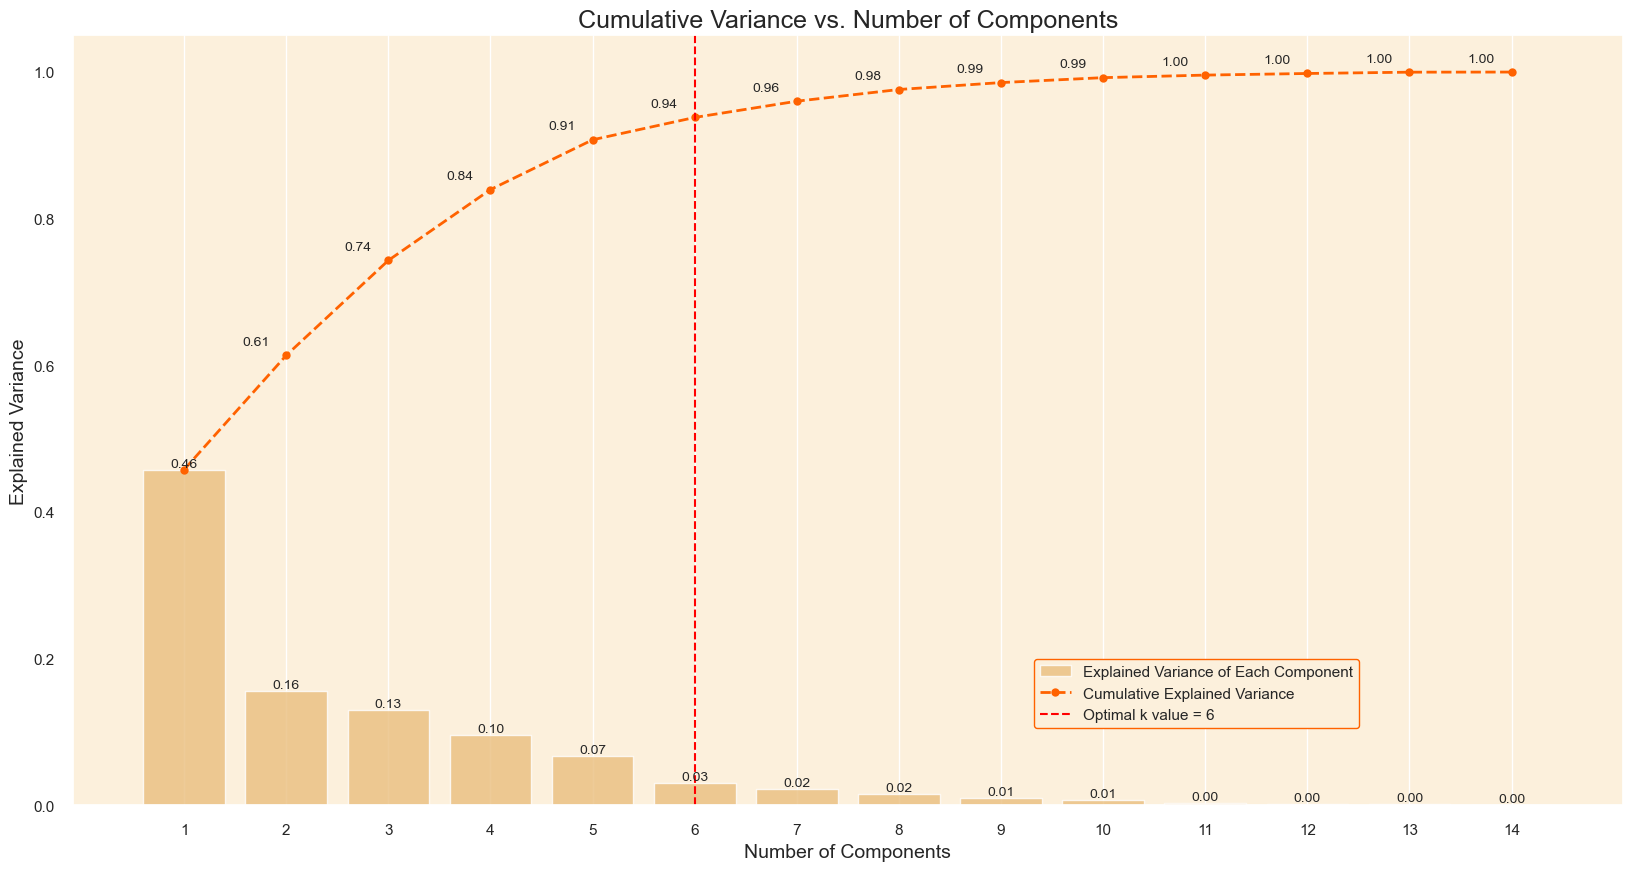

In [558]:
# Setting CustomerID as the index column
customer_data_scaled.set_index('ID', inplace=True)

# Apply PCA
pca = PCA().fit(customer_data_scaled)

# Calculate the Cumulative Sum of the Explained Variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Set the optimal k value (based on our analysis, we can choose 6)
optimal_k = 6

# Set seaborn plot style
sns.set(rc={'axes.facecolor': '#fcf0dc'}, style='darkgrid')

# Plot the cumulative explained variance against the number of components
plt.figure(figsize=(20, 10))

# Bar chart for the explained variance of each component
barplot = sns.barplot(x=list(range(1, len(cumulative_explained_variance) + 1)),
                      y=explained_variance_ratio,
                      color='#fcc36d',
                      alpha=0.8)

# Line plot for the cumulative explained variance
lineplot, = plt.plot(range(0, len(cumulative_explained_variance)), cumulative_explained_variance,
                     marker='o', linestyle='--', color='#ff6200', linewidth=2)

# Plot optimal k value line
optimal_k_line = plt.axvline(optimal_k - 1, color='red', linestyle='--', label=f'Optimal k value = {optimal_k}') 

# Set labels and title
plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Explained Variance', fontsize=14)
plt.title('Cumulative Variance vs. Number of Components', fontsize=18)

# Customize ticks and legend
plt.xticks(range(0, len(cumulative_explained_variance)))
plt.legend(handles=[barplot.patches[0], lineplot, optimal_k_line],
           labels=['Explained Variance of Each Component', 'Cumulative Explained Variance', f'Optimal k value = {optimal_k}'],
           loc=(0.62, 0.1),
           frameon=True,
           framealpha=1.0,  
           edgecolor='#ff6200')  

# Display the variance values for both graphs on the plots
x_offset = -0.3
y_offset = 0.01
for i, (ev_ratio, cum_ev_ratio) in enumerate(zip(explained_variance_ratio, cumulative_explained_variance)):
    plt.text(i, ev_ratio, f"{ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)
    if i > 0:
        plt.text(i + x_offset, cum_ev_ratio + y_offset, f"{cum_ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)

plt.grid(axis='both')   
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
<h3 align="left"><font color=#ff6200>Conclusion </font></h3>
    
The plot and the cumulative explained variance values indicate how much of the total variance in the dataset is captured by each principal component, as well as the cumulative variance explained by the first n components.

Here, we can observe that:

- The first component explains approximately 46% of the variance.

- The first two components together explain about 62% of the variance.

- The first three components explain approximately 75% of the variance, and so on.

    
To choose the optimal number of components, we generally look for a point where adding another component doesn't significantly increase the cumulative explained variance, often referred to as the "__elbow point__" in the curve.

From the plot, we can see that the increase in cumulative variance starts to slow down after the __6th component__ (which __captures about 94% of the total variance__).

Considering the context of customer segmentation, we want to retain a sufficient amount of information to identify distinct customer groups effectively. Therefore, retaining __the first 6 components__ might be a balanced choice, as they together explain a substantial portion of the total variance while reducing the dimensionality of the dataset.

In [559]:
# Creating a PCA object with 6 components
pca = PCA(n_components=6)

# Fitting and transforming the original data to the new PCA dataframe
customer_data_pca = pca.fit_transform(customer_data_scaled)

# Creating a new dataframe from the PCA dataframe, with columns labeled PC1, PC2, etc.
customer_data_pca = pd.DataFrame(customer_data_pca, columns=['PC'+str(i+1) for i in range(pca.n_components_)])

# Adding the CustomerID index back to the new PCA dataframe
customer_data_pca.index = customer_data_scaled.index

In [560]:
# Displaying the resulting dataframe based on the PCs
customer_data_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6
ID,,,,,,
2174,2.680561,0.631084,0.308492,1.398800,-0.310148,-0.627555
4141,-2.664461,0.643241,-1.189119,0.515701,-1.126496,0.170239
6182,1.730170,1.268701,-1.274535,-0.929864,-0.638580,-0.334356
5324,-1.107073,-2.011624,1.732215,-0.554374,0.301878,0.118250
7446,-1.843951,1.308493,0.002346,0.311721,-0.908476,-0.582960


<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

Now, let's extract the coefficients corresponding to each principal component to better understand the transformation performed by PCA:

In [561]:
# Define a function to highlight the top 3 absolute values in each column of a dataframe
def highlight_top3(column):
    top3 = column.abs().nlargest(3).index
    return ['background-color:  #ffeacc' if i in top3 else '' for i in column.index]

# Create the PCA component DataFrame and apply the highlighting function
pc_df = pd.DataFrame(pca.components_.T, columns=['PC{}'.format(i+1) for i in range(pca.n_components_)],  
                     index=customer_data_scaled.columns)

pc_df.style.apply(highlight_top3, axis=0)

,PC1,PC2,PC3,PC4,PC5,PC6
Recency,0.037994,-0.687869,0.065594,-0.013557,0.145856,-0.129333
Frequency,-0.380322,-0.046990,0.195406,-0.084279,0.014904,-0.357109
Monetary,-0.393686,-0.093036,-0.005318,-0.072733,-0.012306,0.328932
Avg_Days_Between_Purchases,0.367177,0.039413,-0.175699,0.124963,-0.008619,0.451506
TotalChildren,0.152071,0.046859,0.334862,-0.029383,0.063952,-0.499922
Income,-0.338531,-0.056873,0.110640,0.454357,-0.016341,0.222362
LTV,-0.403745,-0.082533,0.074364,-0.044978,-0.012286,0.145999
Spending_per_Day,-0.396052,-0.080656,0.088239,0.006243,-0.041721,0.144419
Recency_Category,0.021753,-0.360454,0.043384,-0.016795,0.082189,-0.076825
Engagement_Score,0.226354,-0.562560,-0.042665,0.077887,0.141078,0.155365


<a id="kmeans"></a>
# <p style="background-color: #ff6200; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 9 | K-Means Clustering</p>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

<h2 align="left"><font color=#ff6200>K-Means:</font></h2>

- __K-Means__ is an unsupervised machine learning algorithm that clusters data into a specified number of groups (K) by minimizing the __within-cluster sum-of-squares (WCSS)__, also known as __inertia__. The algorithm iteratively assigns each data point to the nearest centroid, then updates the centroids by calculating the mean of all assigned points. The process repeats until convergence or a stopping criterion is reached. 

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

<h2 align="left"><font color=#ff6200>Drawbacks of K-Means:</font></h2>


Here are the main drawbacks of the K-means clustering algorithm and their corresponding solutions:

- 1️⃣ __Inertia is influenced by the number of dimensions__: The value of inertia tends to increase in high-dimensional spaces due to the curse of dimensionality, which can distort the Euclidean distances between data points.

> __Solution:__ Performing dimensionality reduction, such as __PCA__, before applying K-means to alleviate this issue and speed up computations.
    
___ 
    
- 2️⃣ __Dependence on Initial Centroid Placement__: The K-means algorithm might find a local minimum instead of a global minimum, based on where the centroids are initially placed.

> __Solution:__ To enhance the likelihood of locating the global minimum, we can employ the __k-means++ initialization__ method.
  
___ 
    
- 3️⃣ __Requires specifying the number of clusters__: K-means requires specifying the number of clusters (K) beforehand, which may not be known in advance.

> __Solution:__ Using methods such as the __elbow method__ and __silhouette analysis__ to estimate the optimal number of clusters.
    
___     
    
- 4️⃣ __Sensitivity to unevenly sized or sparse clusters__: K-means might struggle with clusters of different sizes or densities.

> __Solution:__ Increasing the number of random initializations (n_init) or consider using algorithms that handle unevenly sized clusters better, like GMM or DBSCAN.
    
___ 

- 5️⃣ __Assumes convex and isotropic clusters__: K-means assumes that clusters are spherical and have similar variances, which is not always the case. It may struggle with elongated or irregularly shaped clusters.
    
> __Solution:__ Considering using clustering algorithms that do not make these assumptions, such as DBSCAN or Gaussian Mixture Model (GMM).
    
    
<img src="https://github.com/FarzadNekouee/Retail_Customer_Segmentation_Recommendation_System/blob/master/kmeans_drawbacks.jpg?raw=true" width="2400">
    
___
    
Taking into account the aforementioned considerations, I initially applied PCA to the dataset. For the KMeans algorithm, I will set the `init` parameter to `k-means++` and `n_init` to `10`. To determine the optimal number of clusters, I will employ the elbow method and silhouette analysis. Additionally, it might be beneficial to explore the use of alternative clustering algorithms such as GMM and DBSCAN in future analyses to potentially enhance the segmentation results.

<a id="optimal_k"></a>
# <b><span style='color:#fcc36d'>Step 9.1 |</span><span style='color:#ff6200'> Determining the Optimal Number of Clusters</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

To ascertain the optimal number of clusters (k) for segmenting customers, I will explore two renowned methods:

* __Elbow Method__

* __Silhouette Method__

    
It's common to utilize both methods in practice to corroborate the results.

<a id="elbow"></a>
## <b><span style='color:#fcc36d'>Step 9.1.1 |</span><span style='color:#ff6200'> Elbow Method</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

<h3 align="left"><font color=#ff6200>What is the Elbow Method?</font></h3>
    
The Elbow Method is a technique for identifying the ideal number of clusters in a dataset. It involves iterating through the data, generating clusters for various values of k. The k-means algorithm calculates the sum of squared distances between each data point and its assigned cluster centroid, known as the __inertia__ or __WCSS__ score. By plotting the inertia score against the k value, we create a graph that typically exhibits an elbow shape, hence the name "__Elbow Method__". The __elbow point__ represents the k-value where the reduction in inertia achieved by increasing k becomes negligible, indicating the optimal stopping point for the number of clusters.

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

<h3 align="left"><font color=#ff6200>Utilizing the YellowBrick Library</font></h3>

In this section, I will employ the __YellowBrick__ library to facilitate the implementation of the __Elbow method__. YellowBrick, an extension of the Scikit-Learn API, is renowned for its ability to rapidly generate insightful visualizations in the field of machine learning.

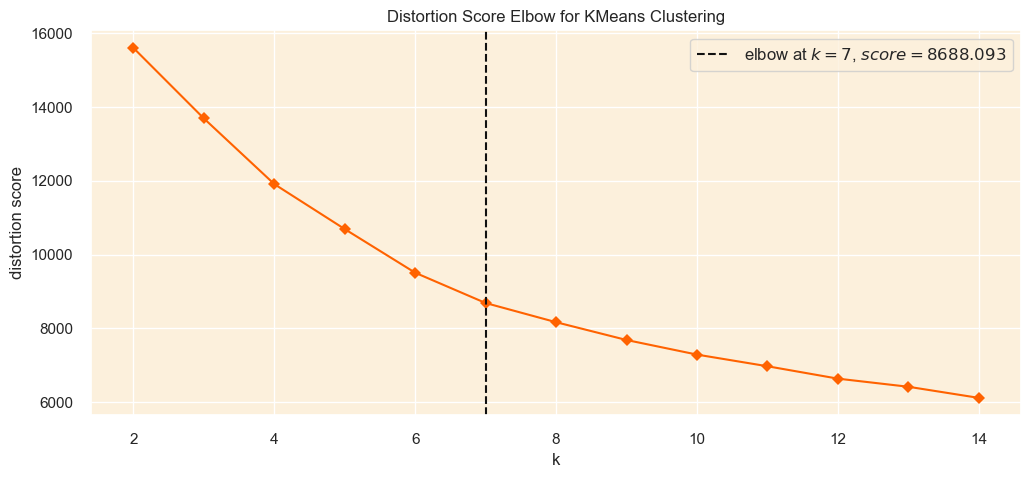

In [563]:
# Set plot style, and background color
sns.set(style='darkgrid', rc={'axes.facecolor': '#fcf0dc'})

# Set the color palette for the plot
sns.set_palette(['#ff6200'])

# Instantiate the clustering model with the specified parameters
km = KMeans(init='k-means++', n_init=10, max_iter=100, random_state=0)

# Create a figure and axis with the desired size
fig, ax = plt.subplots(figsize=(12, 5))

# Instantiate the KElbowVisualizer with the model and range of k values, and disable the timing plot
visualizer = KElbowVisualizer(km, k=(2, 15), timings=False, ax=ax)

# Fit the data to the visualizer
visualizer.fit(customer_data_pca)

# Finalize and render the figure
visualizer.show();

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

<h3 align="left"><font color=#ff6200>Optimal k Value: Elbow Method Insights</font></h3>

The optimal value of k for the KMeans clustering algorithm can be found at the __elbow point__. Using the YellowBrick library for the Elbow method, we observe that the suggested optimal k value is __7__. However, __we don't have a very distinct elbow point in this case__, which is common in real-world data. From the plot, we can see that the inertia continues to decrease significantly up to k=7, indicating that __the optimum value of k could be between 3 and 8__. To choose the best k within this range, we can employ the __silhouette analysis__, another cluster quality evaluation method. Additionally, incorporating business insights can help determine a practical k value.

<a id="silhouette"></a>
## <b><span style='color:#fcc36d'>Step 9.1.2 |</span><span style='color:#ff6200'> Silhouette Method</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

<h3 align="left"><font color=#ff6200>What is the Silhouette Method?</font></h3>
    
The __Silhouette Method__ is an approach to find the optimal number of clusters in a dataset by evaluating the consistency within clusters and their separation from other clusters. It computes the __silhouette coefficient for each data point__, which measures how similar a point is to its own cluster compared to other clusters.

____
    
<h3 align="left"><font color=#ff6200>What is the Silhouette Coefficient?</font></h3>
    
To determine the silhouette coefficient for a given point i, follow these steps:

* __Calculate a(i)__: Compute the average distance between point i and all other points within its cluster.
* __Calculate b(i)__: Compute the average distance between point i and all points in the nearest cluster to its own.
* __Compute the silhouette coefficient__, s(i), for point i using the following formula: 
    
    $$ s(i) = \frac{b(i) - a(i)}{\max(b(i), a(i))} $$
    
__Note:__ The silhouette coefficient quantifies the similarity of a point to its own cluster (cohesion) relative to its separation from other clusters. This value ranges from -1 to 1, with higher values signifying that the point is well aligned with its cluster and has a low similarity to neighboring clusters.    

____
    
<h3 align="left"><font color=#ff6200>What is the Silhouette Score?</font></h3>
    
The __silhouette score__ is the __average silhouette coefficient__ calculated for all data points in a dataset. It provides an overall assessment of the clustering quality, taking into account both cohesion within clusters and separation between clusters. A higher silhouette score indicates a better clustering configuration.    
    
____
       
<h3 align="left"><font color=#ff6200>What are the Advantages of Silhouette Method over the Elbow Method?</font></h3>
    
* The __Silhouette Method__ evaluates cluster quality by considering __both__ the __cohesion within clusters__ and their __separation__ from other clusters. This provides a more comprehensive measure of clustering performance compared to the __Elbow Method__, which only considers the __inertia__ (sum of squared distances within clusters).


* The __Silhouette Method__ produces a silhouette score that directly quantifies the quality of clustering, making it easier to compare different values of k. In contrast, the __Elbow Method__ relies on the subjective interpretation of the elbow point, which can be less reliable in cases where the plot does not show a clear elbow.

    
* The __Silhouette Method__ generates a visual representation of silhouette coefficients for each data point, allowing for easier identification of fluctuations and outliers within clusters. This helps in determining the optimal number of clusters with higher confidence, as opposed to the __Elbow Method__, which relies on visual inspection of the inertia plot.

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

<h3 align="left"><font color=#ff6200>Methodology</font></h3>
    
In the following analysis:

- I will initially choose a range of 3-8 for the number of clusters (k) based on the Elbow method from the previous section. Next, I will plot __Silhouette scores__ for each k value to determine the one with the highest score.


- Subsequently, to fine-tune the selection of the most appropriate k, I will generate __Silhouette plots__ that visually display the __silhouette coefficients for each data point within various clusters__.


The __YellowBrick__ library will be utilized once again to create these plots and facilitate a comparative analysis.

In [564]:
def silhouette_analysis(df, start_k=3, stop_k=8, figsize=(15, 16)):
    """
    Perform Silhouette analysis for a range of k values (3 to 8) and visualize the results.
    """

    # Set the size of the figure
    plt.figure(figsize=figsize)

    # Create a grid with (stop_k - start_k + 1) rows and 2 columns
    grid = gridspec.GridSpec(stop_k - start_k + 1, 2)

    # Assign the first plot to the first row and both columns
    first_plot = plt.subplot(grid[0, :])

    # First plot: Silhouette scores for different k values
    sns.set_palette(['darkorange'])

    silhouette_scores = []

    # Iterate through the range of k values
    for k in range(start_k, stop_k + 1):
        km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=0)
        km.fit(df)
        labels = km.predict(df)
        score = silhouette_score(df, labels)
        silhouette_scores.append(score)

    best_k = start_k + silhouette_scores.index(max(silhouette_scores))

    plt.plot(range(start_k, stop_k + 1), silhouette_scores, marker='o')
    plt.xticks(range(start_k, stop_k + 1))
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette score')
    plt.title('Average Silhouette Score for Different k Values', fontsize=15)

    # Add the optimal k value text to the plot
    optimal_k_text = f'The k value with the highest Silhouette score is: {best_k}'
    plt.text(6.5, min(silhouette_scores) + 0.05, optimal_k_text, fontsize=12, verticalalignment='bottom', 
             horizontalalignment='left', bbox=dict(facecolor='#fcc36d', edgecolor='#ff6200', boxstyle='round, pad=0.5'))

    # Second plot (subplot): Silhouette plots for each k value
    colors = sns.color_palette("bright")

    for i in range(start_k, stop_k + 1):    
        km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=0)
        row_idx, col_idx = divmod(i - start_k, 2)

        # Assign the plots to the second, third, and fourth rows
        ax = plt.subplot(grid[row_idx + 1, col_idx])

        visualizer = SilhouetteVisualizer(km, colors=colors, ax=ax)
        visualizer.fit(df)

        # Add the Silhouette score text to the plot
        score = silhouette_score(df, km.labels_)
        ax.text(0.97, 0.02, f'Silhouette Score: {score:.2f}', fontsize=12, \
                ha='right', transform=ax.transAxes, color='red')

        ax.set_title(f'Silhouette Plot for {i} Clusters', fontsize=15)

    plt.tight_layout()
    plt.show()

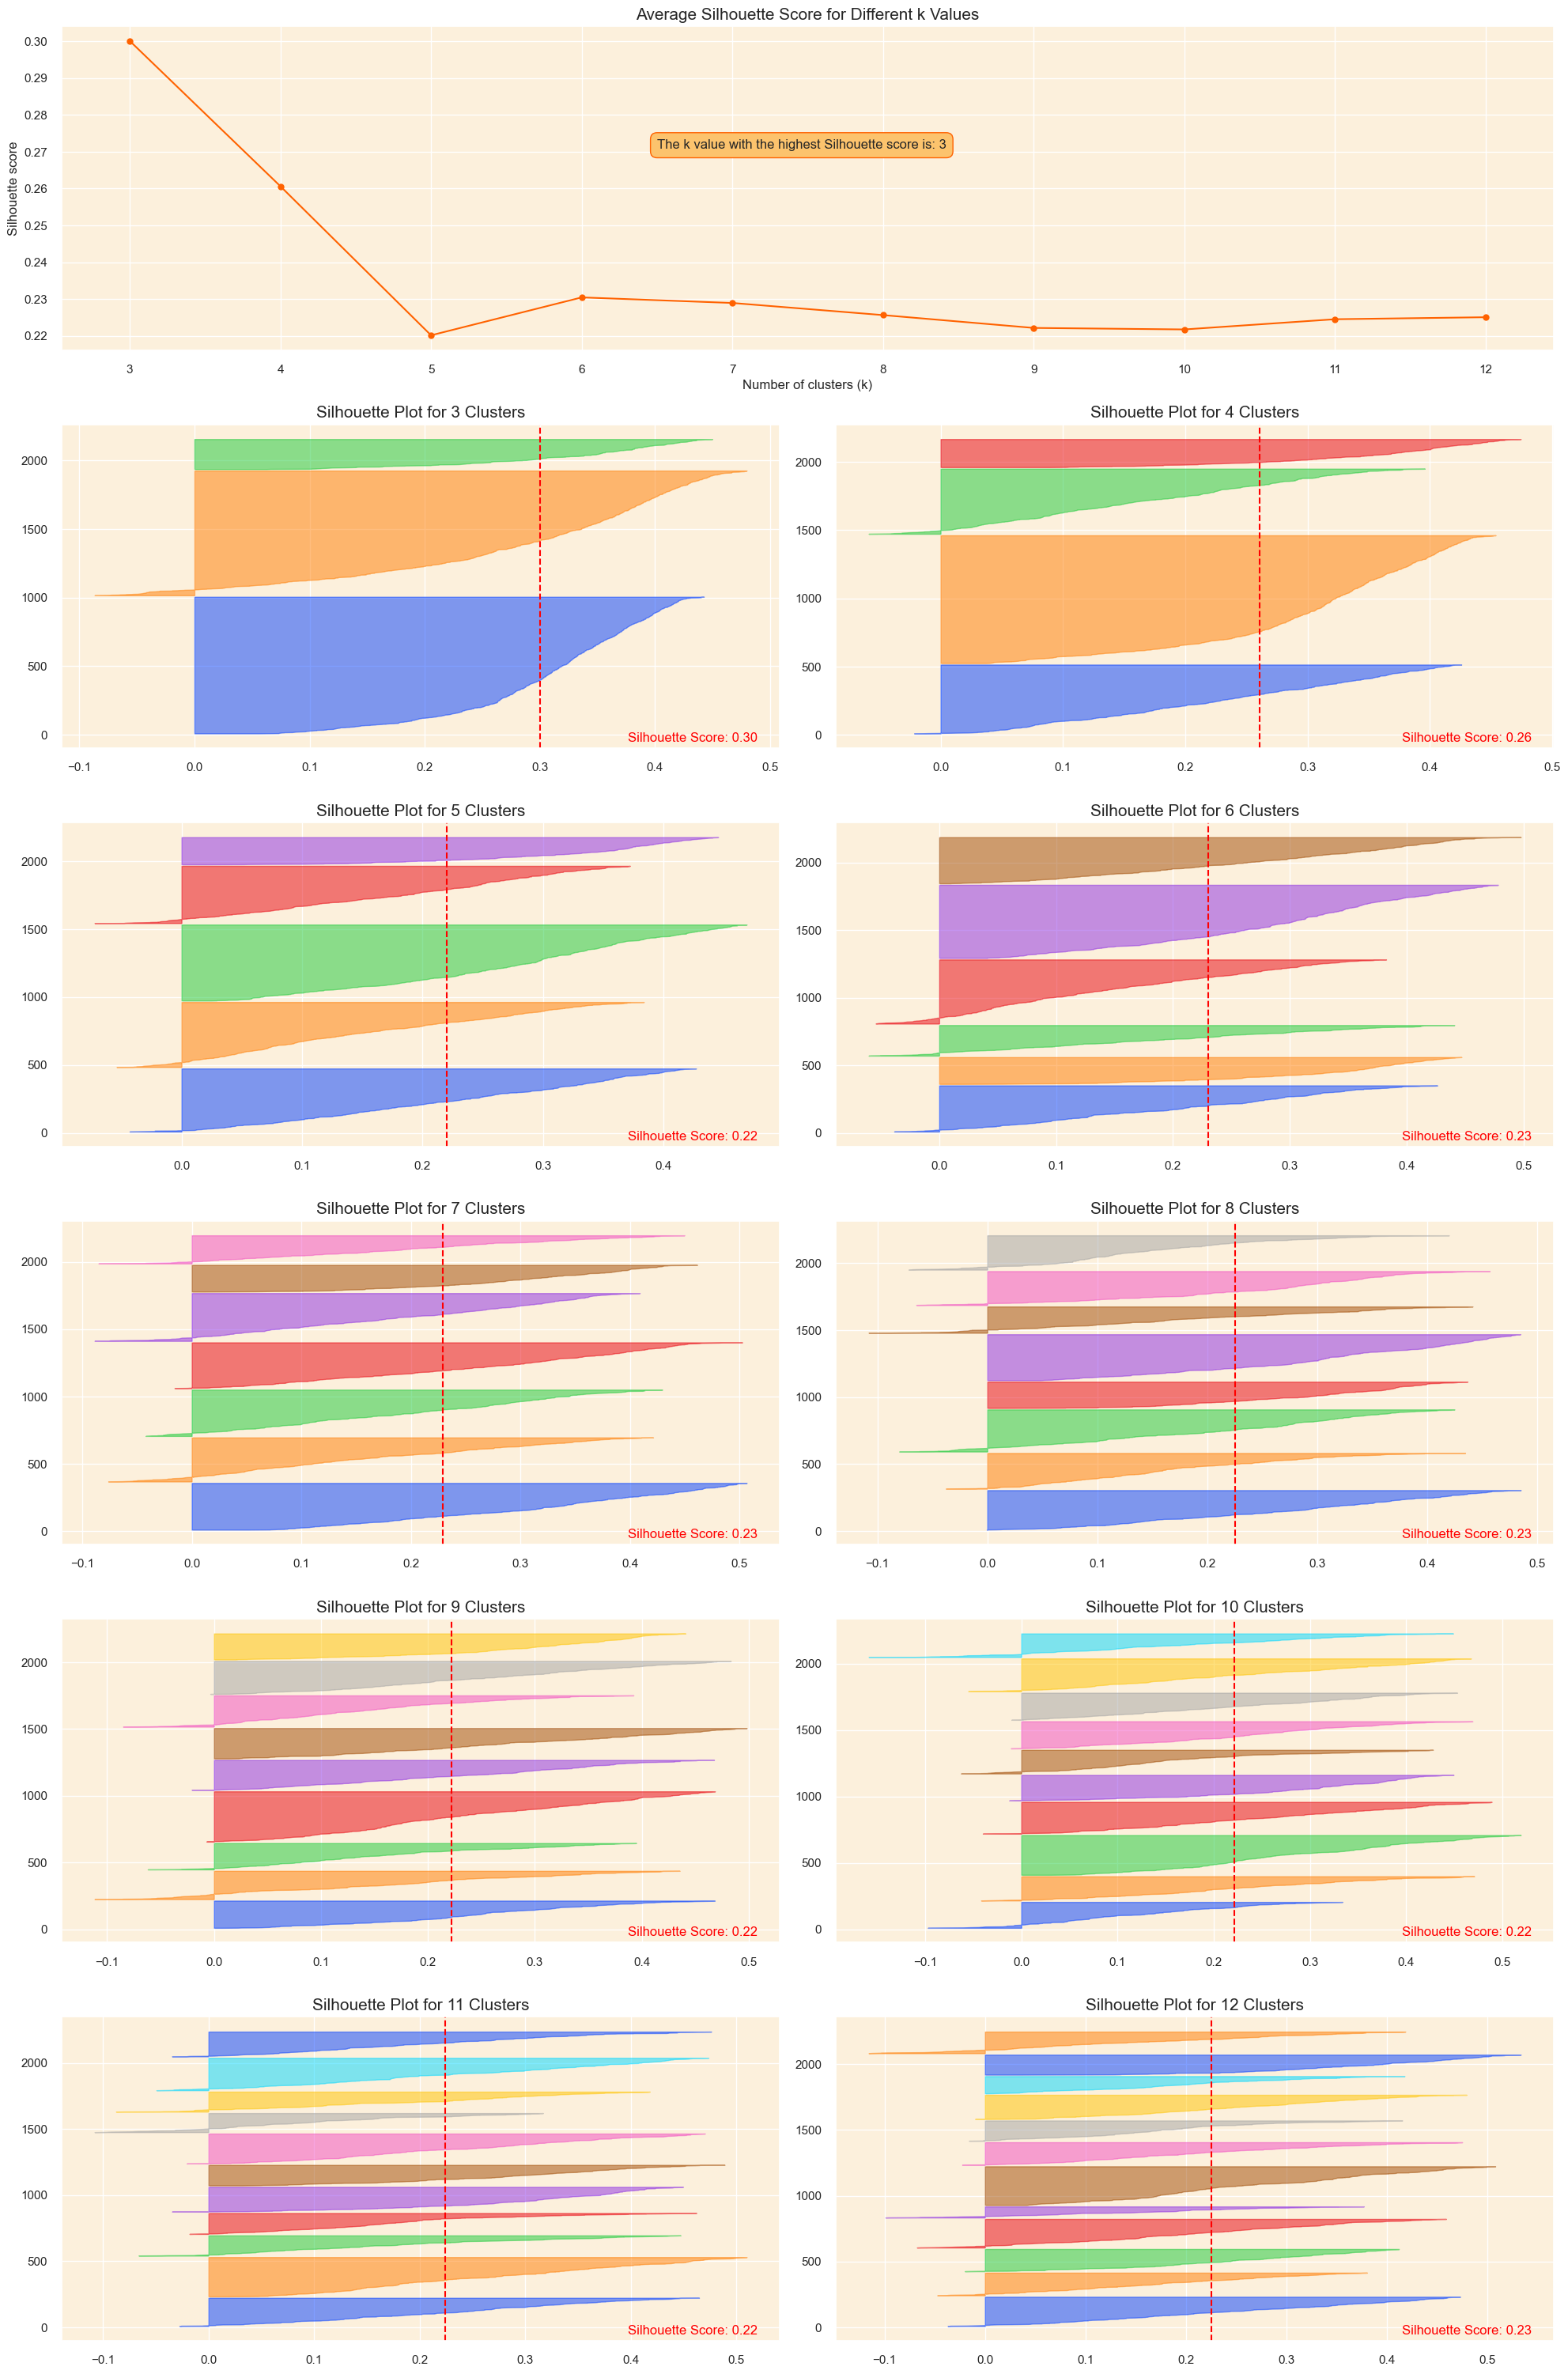

In [565]:
silhouette_analysis(customer_data_pca, 3, 12, figsize=(20, 50))

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

<h3 align="left"><font color=#ff6200>Guidelines to Interpret Silhouette Plots and Determine the Optimal K:</font></h3>


To interpret silhouette plots and identify the optimal number of clusters (\( k \)), consider the following criteria:

- 1️⃣ Top Plot - Average Silhouette Scorets__:
   
    - This plot displays the average silhouette score for different values of K.
    - The point with the highest average silhouette score indicates the optimal cluster number. From the plot, it seems 𝑘=3 has the highest silhouette score.
  
____
    
    
- 2️⃣ Silhouette Plots for Each 𝑘__:

   - These individual plots show the silhouette coefficients for each data point at various k values.
   - Silhouette widths are mostly positive and close to +1.
   - Similar widths across clusters.
   - There is variability in silhouette widths, indicating some poorly defined clusters or overlapping ones.
   - This suggests that k=3 might still be the most balanced choice.

    

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

<h3 align="left"><font color=#ff6200>Optimal k Value: Silhouette Method Insights</font></h3>

Based on above guidelines and after carefully considering the silhouette plots, it's clear that choosing __\( k = 3 \)__ is the better option. This choice gives us clusters that are more evenly matched and well-defined, making our clustering solution stronger and more reliable.

<a id="kmeans_model"></a>
# <b><span style='color:#fcc36d'>Step 9.2 |</span><span style='color:#ff6200'> Clustering Model - K-means</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

In this step, I am going to apply the K-means clustering algorithm to segment customers into different clusters based on their purchasing behaviors and other characteristics, using the optimal number of clusters determined in the previous step.

It's important to note that the K-means algorithm might assign different labels to the clusters in each run. To address this, we have taken an additional step to swap the labels based on the frequency of samples in each cluster, ensuring a consistent label assignment across different runs.

In [566]:
# Apply KMeans clustering using the optimal k
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=100, random_state=0)
kmeans.fit(customer_data_pca)

# Get the frequency of each cluster
cluster_frequencies = Counter(kmeans.labels_)

# Create a mapping from old labels to new labels based on frequency
label_mapping = {label: new_label for new_label, (label, _) in 
                 enumerate(cluster_frequencies.most_common())}

# Reverse the mapping to assign labels as per your criteria
label_mapping = {v: k for k, v in {2: 1, 1: 0, 0: 2}.items()}

# Apply the mapping to get the new labels
new_labels = np.array([label_mapping[label] for label in kmeans.labels_])

# Append the new cluster labels back to the original dataset
customer_data_cleaned['cluster'] = new_labels

# Append the new cluster labels to the PCA version of the dataset
customer_data_pca['cluster'] = new_labels

In [567]:
# Display the first few rows of the original dataframe
customer_data_cleaned.head()

,ID,Recency,Frequency,Monetary,Avg_Days_Between_Purchases,TotalChildren,Income,LTV,Spending_per_Day,Recency_Category,Engagement_Score,Spending_to_Income_Ratio,Household_Size,Loyalty,Age_Group,cluster
1,2174,38,3.583519,8.861634,658.166667,2,46344.0,31.755832,0.013464,2,10.604102,0.000191,2,0.0,2,2
2,4141,26,6.386879,26.391579,197.523810,0,71613.0,168.559828,0.133612,1,4.070846,0.000369,0,0.0,1,1
3,6182,26,3.806662,12.714816,496.875000,1,26646.0,48.401014,0.025590,1,6.830130,0.000477,1,0.0,1,2
4,5324,94,6.915723,23.677309,210.368421,1,58293.0,163.745723,0.112552,3,13.592215,0.000406,3,0.0,1,1
5,7446,16,7.051856,21.081320,187.681818,1,62513.0,148.662427,0.112325,1,2.268906,0.000337,1,0.0,1,1


<a id="evaluation"></a>
# <p style="background-color: #ff6200; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 10 | Clustering Evaluation</p>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

After determining the optimal number of clusters (which is 3 in our case) using elbow and silhouette analyses, I move onto the evaluation step to assess the quality of the clusters formed. This step is essential to validate the effectiveness of the clustering and to ensure that the clusters are __coherent__ and __well-separated__. The evaluation metrics and a visualization technique I plan to use are outlined below:
    
- 1️⃣ __3D Visualization of Top PCs__ 

    
- 2️⃣ __Cluster Distribution Visualization__ 
    
    
- 3️⃣ __Evaluation Metrics__ 
    
    * Silhouette Score
    * Calinski Harabasz Score
    * Davies Bouldin Score
       
____  
    
**Note**: We are using the PCA version of the dataset for evaluation because this is the space where the clusters were actually formed, capturing the most significant patterns in the data. Evaluating in this space ensures a more accurate representation of the cluster quality, helping us understand the true cohesion and separation achieved during clustering. This approach also aids in creating a clearer 3D visualization using the top principal components, illustrating the actual separation between clusters.

<a id="3d_visualization"></a>
# <b><span style='color:#fcc36d'>Step 10.1 |</span><span style='color:#ff6200'>  3D Visualization of Top Principal Components</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

In this part, I am going to choose the top 3 PCs (which capture the most variance in the data) and use them to create a 3D visualization. This will allow us to visually inspect the quality of separation and cohesion of clusters to some extent:

In [568]:
# Setting up the color scheme for the clusters (RGB order)
colors = ['#e8000b', '#1ac938', '#023eff']

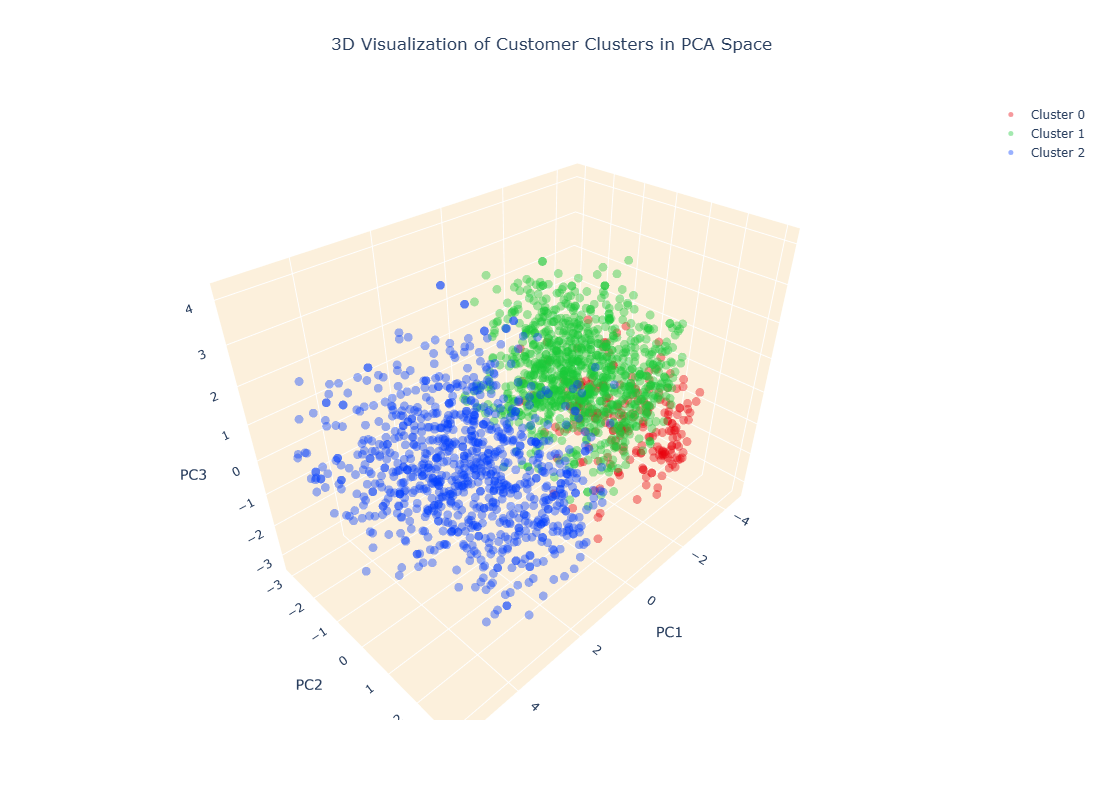

In [569]:
# Create separate data frames for each cluster
cluster_0 = customer_data_pca[customer_data_pca['cluster'] == 0]
cluster_1 = customer_data_pca[customer_data_pca['cluster'] == 1]
cluster_2 = customer_data_pca[customer_data_pca['cluster'] == 2]

# Create a 3D scatter plot
fig = go.Figure()

# Add data points for each cluster separately and specify the color
fig.add_trace(go.Scatter3d(x=cluster_0['PC1'], y=cluster_0['PC2'], z=cluster_0['PC3'], 
                           mode='markers', marker=dict(color=colors[0], size=5, opacity=0.4), name='Cluster 0'))
fig.add_trace(go.Scatter3d(x=cluster_1['PC1'], y=cluster_1['PC2'], z=cluster_1['PC3'], 
                           mode='markers', marker=dict(color=colors[1], size=5, opacity=0.4), name='Cluster 1'))
fig.add_trace(go.Scatter3d(x=cluster_2['PC1'], y=cluster_2['PC2'], z=cluster_2['PC3'], 
                           mode='markers', marker=dict(color=colors[2], size=5, opacity=0.4), name='Cluster 2'))

# Set the title and layout details
fig.update_layout(
    title=dict(text='3D Visualization of Customer Clusters in PCA Space', x=0.5),
    scene=dict(
        xaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='PC1'),
        yaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='PC2'),
        zaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='PC3'),
    ),
    width=900,
    height=800
)

# Show the plot
fig.show()

<a id="cluster_distributuion"></a>
# <b><span style='color:#fcc36d'>Step 10.2 |</span><span style='color:#ff6200'>  Cluster Distribution Visualization</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
I am going to utilize a bar plot to visualize the percentage of customers in each cluster, which helps in understanding if the clusters are balanced and significant:

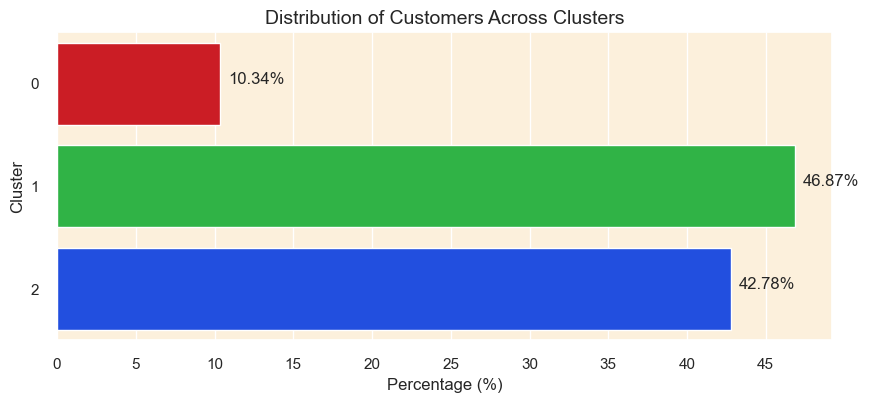

In [570]:
# Calculate the percentage of customers in each cluster
cluster_percentage = (customer_data_pca['cluster'].value_counts(normalize=True) * 100).reset_index()
cluster_percentage.columns = ['Cluster', 'Percentage']
cluster_percentage.sort_values(by='Cluster', inplace=True)

# Create a horizontal bar plot
plt.figure(figsize=(10, 4))
sns.barplot(x='Percentage', y='Cluster', data=cluster_percentage, orient='h', palette=colors)

# Adding percentages on the bars
for index, value in enumerate(cluster_percentage['Percentage']):
    plt.text(value+0.5, index, f'{value:.2f}%')

plt.title('Distribution of Customers Across Clusters', fontsize=14)
plt.xticks(ticks=np.arange(0, 50, 5))
plt.xlabel('Percentage (%)')

# Show the plot
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
<h3 align="left"><font color=#ff6200>Inference</font></h3>
    
The distribution of customers across the clusters, as depicted by the bar plot, suggests a fairly balanced distribution with cluster 1 holding 47% and cluster 2 43% and cluster 0 accommodating approximately 10% of the customers. 

This balanced distribution indicates that our clustering process has been largely successful in identifying meaningful patterns within the data, rather than merely grouping noise or outliers. It implies that each cluster represents a substantial and distinct segment of the customer base, thereby offering valuable insights for future business strategies.

Moreover, the fact that no cluster contains a very small percentage of customers, assures us that each cluster is significant and not just representing outliers or noise in the data. This setup allows for a more nuanced understanding and analysis of different customer segments, facilitating effective and informed decision-making.

<a id="evaluations_metrics"></a>
# <b><span style='color:#fcc36d'>Step 10.3 |</span><span style='color:#ff6200'> Evaluation Metrics</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

To further scrutinize the quality of our clustering, I will employ the following metrics:

- __Silhouette Score__: A measure to evaluate the separation distance between the clusters. Higher values indicate better cluster separation. It ranges from -1 to 1.
    
    
- __Calinski Harabasz Score__: This score is used to evaluate the dispersion between and within clusters. A higher score indicates better defined clusters.

    
- __Davies Bouldin Score__: It assesses the average similarity between each cluster and its most similar cluster. Lower values indicate better cluster separation.

In [571]:
# Compute number of customers
num_observations = len(customer_data_pca)

# Separate the features and the cluster labels
X = customer_data_pca.drop('cluster', axis=1)
clusters = customer_data_pca['cluster']

# Compute the metrics
sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

# Create a table to display the metrics and the number of observations
table_data = [
    ["Number of Observations", num_observations],
    ["Silhouette Score", sil_score],
    ["Calinski Harabasz Score", calinski_score],
    ["Davies Bouldin Score", davies_score]
]

# Print the table
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))

+-------------------------+--------------------+
|         Metric          |       Value        |
+-------------------------+--------------------+
| Number of Observations  |        2127        |
|    Silhouette Score     | 0.3000820724562101 |
| Calinski Harabasz Score | 901.2387559884991  |
|  Davies Bouldin Score   | 1.291919546632178  |
+-------------------------+--------------------+


<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
<h3 align="left"><font color=#ff6200>Clustering Quality Inference</font></h3>
    
    
- The __Silhouette Score__ of approximately 0.30, although not close to 1, still indicates a fair amount of separation between the clusters. It suggests that the clusters are somewhat distinct, but there might be slight overlaps between them. Generally, a score closer to 1 would be ideal, indicating more distinct and well-separated clusters.

    
- The __Calinski Harabasz Score__ is 901.23, which is considerably high, indicating that the clusters are well-defined. A higher score in this metric generally signals better cluster definitions, thus implying that our clustering has managed to find substantial structure in the data.

    
- The __Davies Bouldin Score__ of 1.29 is a reasonable score, indicating a moderate level of similarity between each cluster and its most similar one. A lower score is generally better as it indicates less similarity between clusters, and thus, our score here suggests a decent separation between the clusters.


In conclusion, the metrics suggest that the clustering is of good quality, with clusters being well-defined and fairly separated. However, there might still be room for further optimization to enhance cluster separation and definition, potentially by trying other clustering and dimensionality reduction algorithms.



<a id="profiling"></a>
# <p style="background-color: #ff6200; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 11 | Cluster Analysis and Profiling</p>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
In this section, I am going to analyze the characteristics of each cluster to understand the distinct behaviors and preferences of different customer segments and also profile each cluster to identify the key traits that define the customers in each cluster.

<a id="radar_chart"></a>
# <b><span style='color:#fcc36d'>Step 11.1 |</span><span style='color:#ff6200'> Radar Chart Approach</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
First of all, I am going to create radar charts to visualize the centroid values of each cluster across different features. This can give a quick visual comparison of the profiles of different clusters.To construct the radar charts, it's essential to first compute the centroid for each cluster. This centroid represents the mean value for all features within a specific cluster. Subsequently, I will display these centroids on the radar charts, facilitating a clear visualization of the central tendencies of each feature across the various clusters:

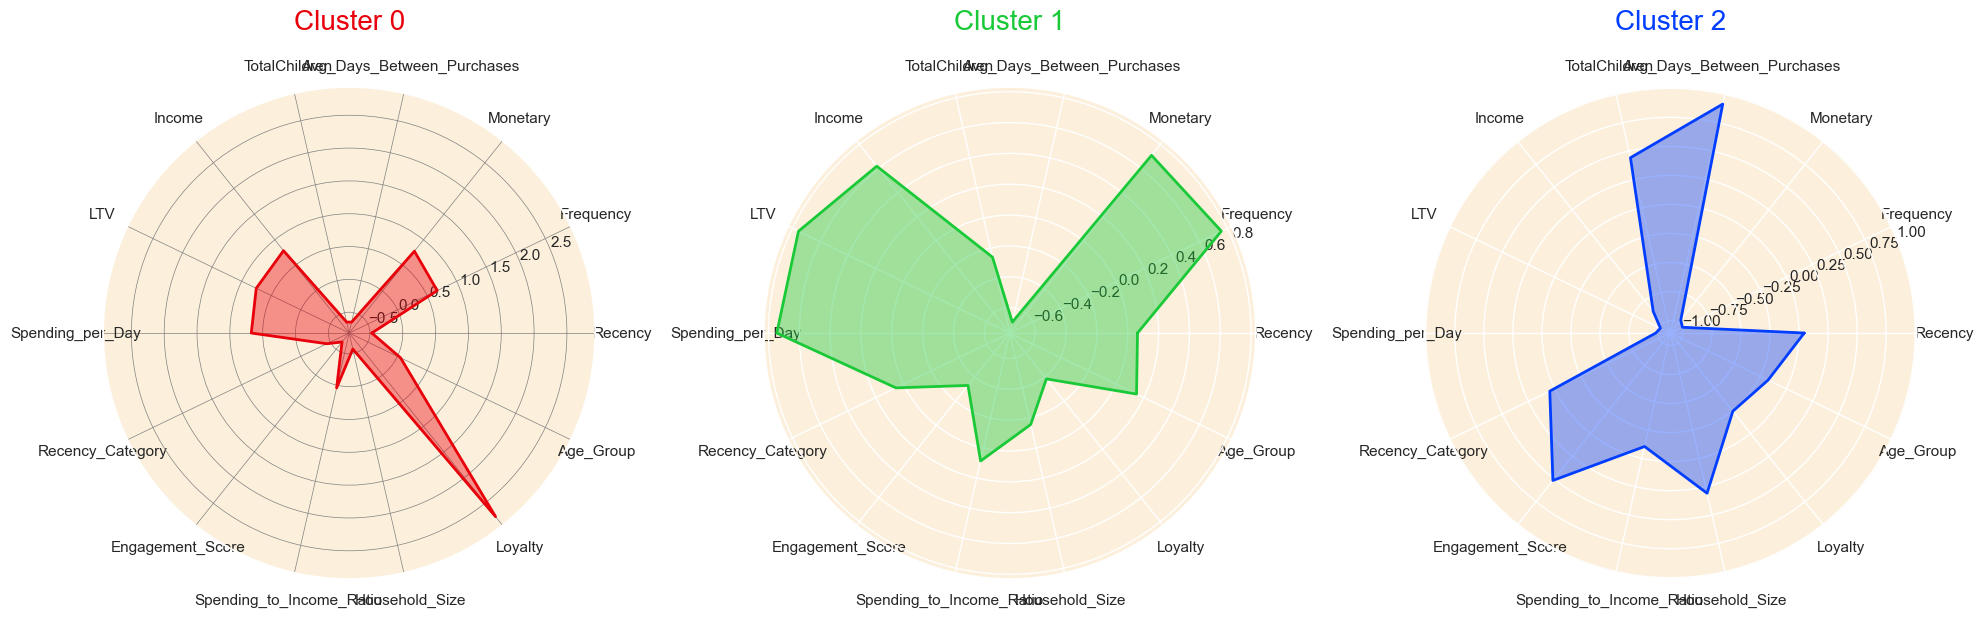

In [573]:
# Setting 'CustomerID' column as index and assigning it to a new dataframe
df_customer = customer_data_cleaned.set_index('ID')

# Standardize the data (excluding the cluster column)
scaler = StandardScaler()
df_customer_standardized = scaler.fit_transform(df_customer.drop(columns=['cluster'], axis=1))

# Create a new dataframe with standardized values and add the cluster column back
df_customer_standardized = pd.DataFrame(df_customer_standardized, columns=df_customer.columns[:-1], index=df_customer.index)
df_customer_standardized['cluster'] = df_customer['cluster']

# Calculate the centroids of each cluster
cluster_centroids = df_customer_standardized.groupby('cluster').mean()

# Function to create a radar chart
def create_radar_chart(ax, angles, data, color, cluster):
    # Plot the data and fill the area
    ax.fill(angles, data, color=color, alpha=0.4)
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid')
    
    # Add a title
    ax.set_title(f'Cluster {cluster}', size=20, color=color, y=1.1)

# Set data
labels=np.array(cluster_centroids.columns)
num_vars = len(labels)

# Compute angle of each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is circular, so we need to "complete the loop" and append the start to the end
labels = np.concatenate((labels, [labels[0]]))
angles += angles[:1]

# Initialize the figure
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw=dict(polar=True), nrows=1, ncols=3)

# Create radar chart for each cluster
for i, color in enumerate(colors):
    data = cluster_centroids.loc[i].tolist()
    data += data[:1]  # Complete the loop
    create_radar_chart(ax[i], angles, data, color, i)

# Add input data
ax[0].set_xticks(angles[:-1])
ax[0].set_xticklabels(labels[:-1])

ax[1].set_xticks(angles[:-1])
ax[1].set_xticklabels(labels[:-1])

ax[2].set_xticks(angles[:-1])
ax[2].set_xticklabels(labels[:-1])

# Add a grid
ax[0].grid(color='grey', linewidth=0.5)

# Display the plot
plt.tight_layout()
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
<h2 align="left"><font color=#ff6200>Customer Profiles Derived from Radar Chart Analysis</font></h2>
    
<h3 align="left"><font color=red>Cluster 0 (Red Chart):</font></h3>

🎯 Profile: __Sporadic Shoppers with Moderate Engagement__  

- Customers in this cluster show lower spending habits and engage in fewer transactions.  
- Their loyalty and engagement scores are moderate but not significantly high.  
- Their spending trend is relatively stable but on the lower side, and they have a low monthly spending variation (low `Monthly_Spending_Std`).  
- Spending per day is below average, and their income levels also appear moderate.  
- They might prefer shopping less frequently with lower monetary contributions.  

____
    
<h3 align="left"><font color=green>Cluster 1 (Green Chart):</font></h3>    
 
🎯 Profile: __Infrequent Big Spenders__  
    
- These customers spend more per transaction, reflected in their higher monetary scores.  
- They exhibit moderate loyalty and are likely to make infrequent but impactful purchases.  
- Their income and spending per day align with higher engagement levels.  
- These customers could represent a strategic group for high-value marketing campaigns.    

____

<h3 align="left"><font color=blue>Cluster 2 (Blue Chart):</font></h3>   

🎯 Profile: __Frequent High-Spenders with Variable Patterns__
    
- This group features customers who frequently make transactions and have higher monetary and income scores.  
- However, their behavior includes significant spending variability, possibly indicating fluctuating buying patterns.  
- They demonstrate high loyalty but might also show inconsistent spending trends or high cancellations. 

<a id="histogram"></a>
# <b><span style='color:#fcc36d'>Step 11.2 |</span><span style='color:#ff6200'> Histogram Chart Approach</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
To validate the profiles identified from the radar charts, we can plot histograms for each feature segmented by the cluster labels. These histograms will allow us to visually inspect the distribution of feature values within each cluster, thereby confirming or refining the profiles we have created based on the radar charts.

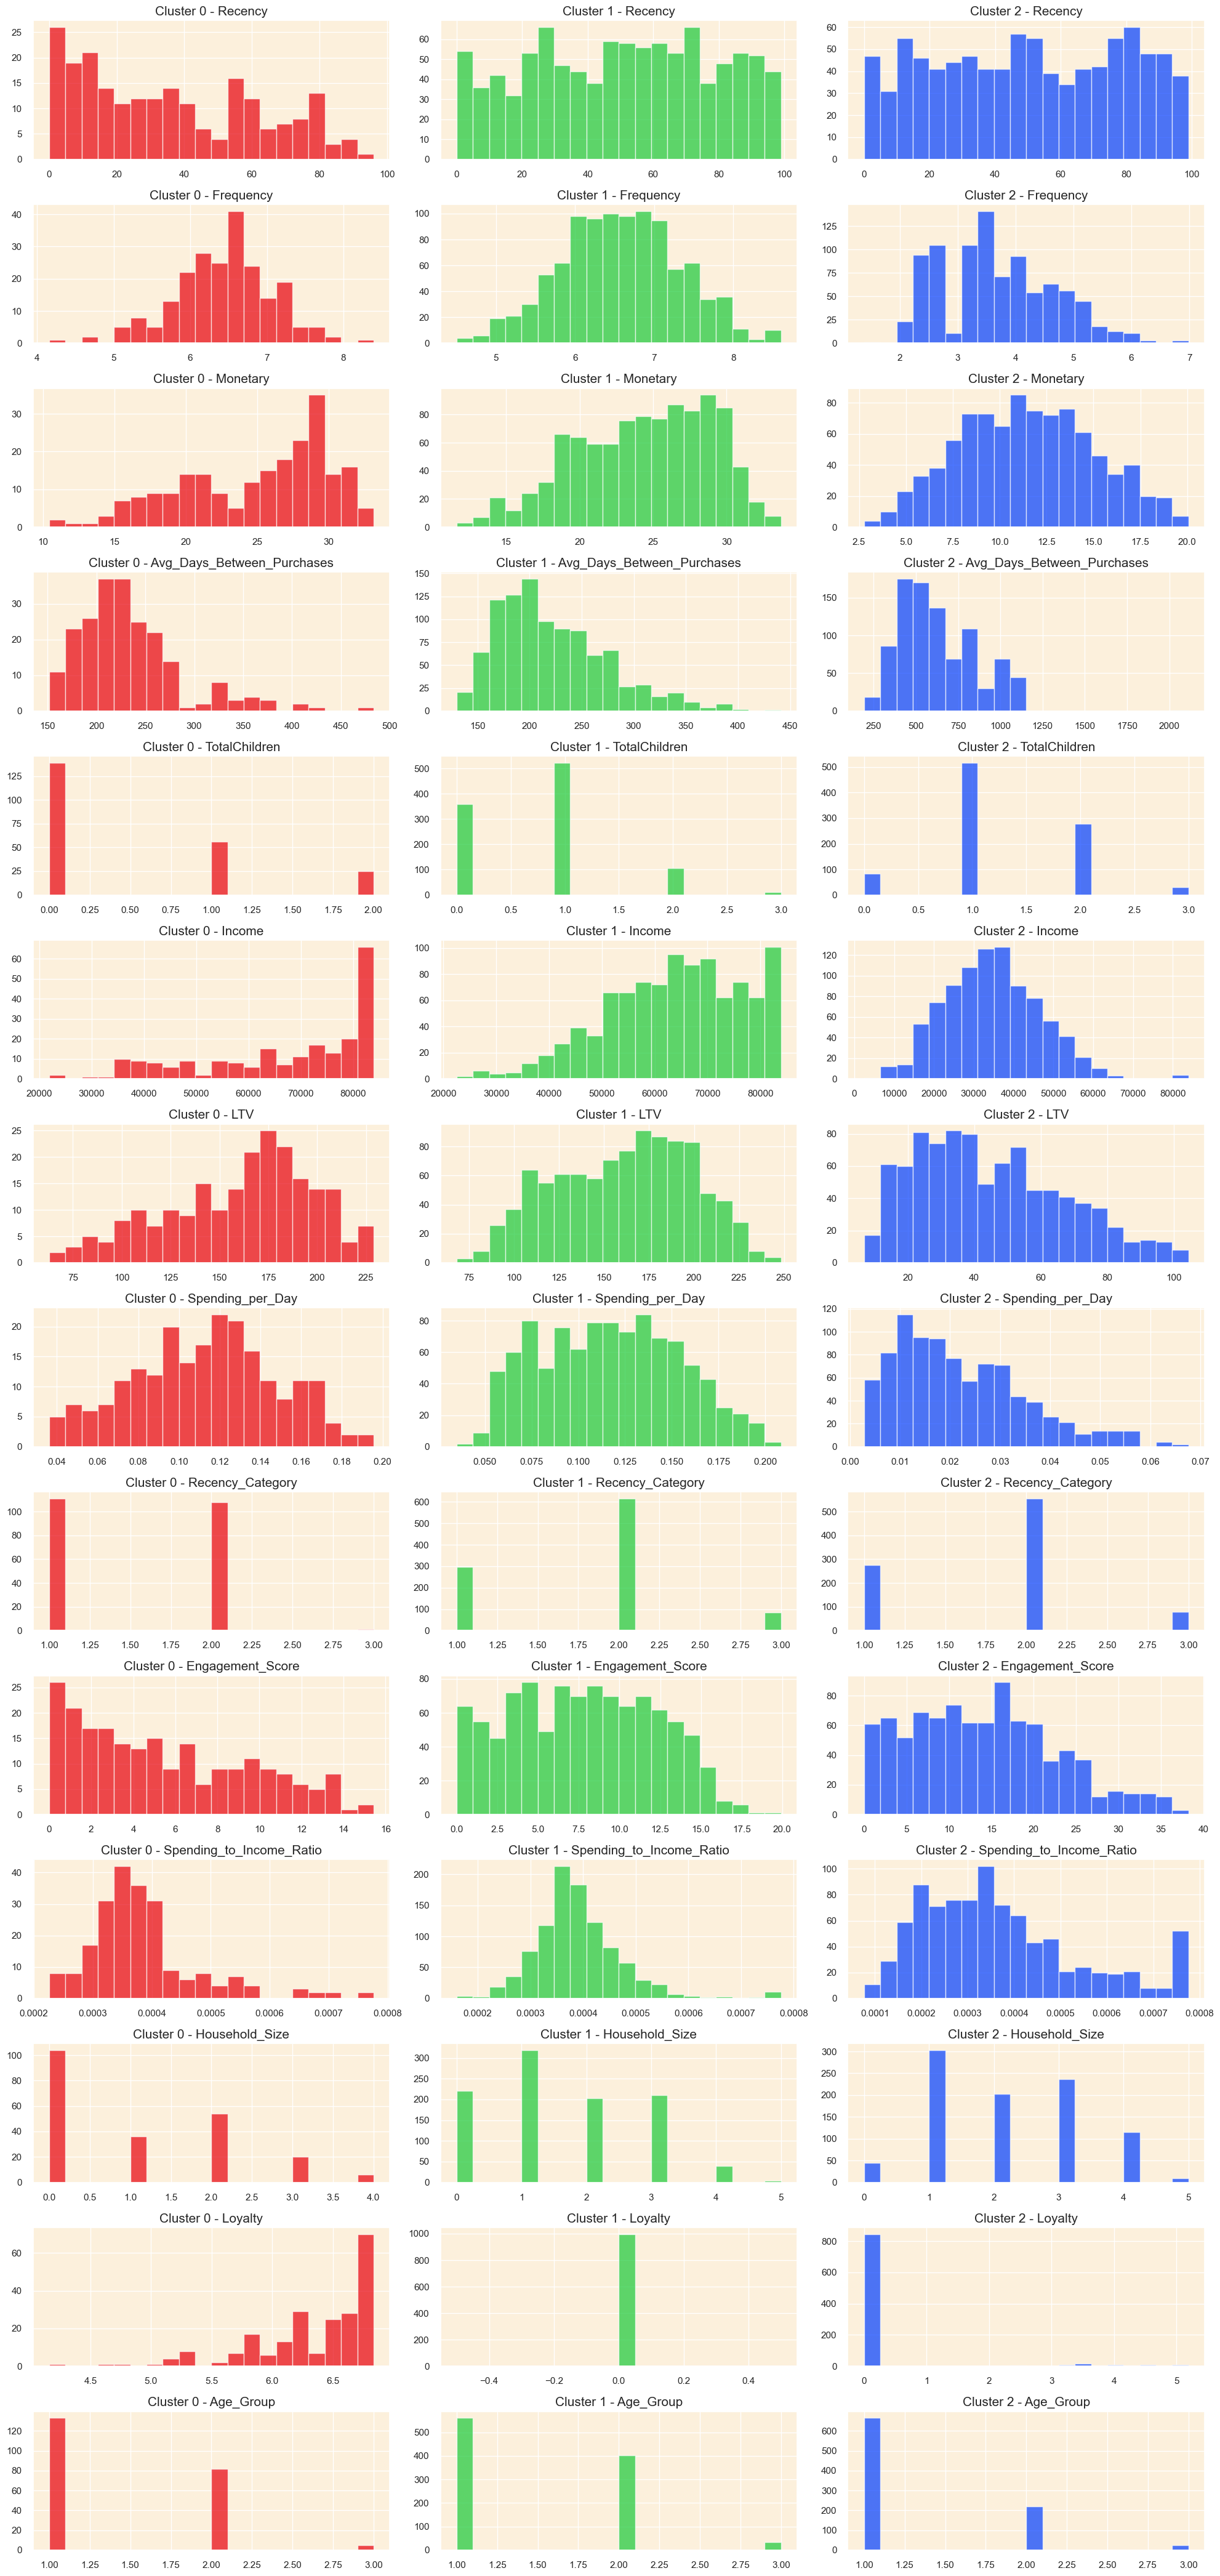

In [574]:
# Plot histograms for each feature segmented by the clusters
features = customer_data_cleaned.columns[1:-1]
clusters = customer_data_cleaned['cluster'].unique()
clusters.sort()

# Setting up the subplots
n_rows = len(features)
n_cols = len(clusters)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 3*n_rows))

# Plotting histograms
for i, feature in enumerate(features):
    for j, cluster in enumerate(clusters):
        data = customer_data_cleaned[customer_data_cleaned['cluster'] == cluster][feature]
        axes[i, j].hist(data, bins=20, color=colors[j], edgecolor='w', alpha=0.7)
        axes[i, j].set_title(f'Cluster {cluster} - {feature}', fontsize=15)
        axes[i, j].set_xlabel('')
        axes[i, j].set_ylabel('')

# Adjusting layout to prevent overlapping
plt.tight_layout()
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
<h3 align="left"><font color=red>Cluster 0 :</font></h3>  

- Characterized by moderate loyalty, infrequent purchases, and lower spending. Predominantly younger customers.
____
    
<h3 align="left"><font color=green>Cluster 1 :</font></h3>      
    
- Characterized by higher engagement, frequent purchases, and higher spending. However, loyalty is low, suggesting potential churn risk. Predominantly young adults.
____

<h3 align="left"><font color=blue>Cluster 2 :</font></h3>   
    
- Characterized by high spending, frequent purchases, and higher engagement. However, loyalty is also low, indicating a risk of losing valuable customers. Predominantly middle-aged customers.  

<a id="recommendation"></a>
# <p style="background-color: #ff6200; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 12 | Recommendation</p>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
<h3 align="left"><font color=red>Cluster 0 :</font></h3>  

- Recommend low-cost, high-frequency products.
- Use discounts and loyalty incentives to encourage repeat purchases.
____
    
<h3 align="left"><font color=green>Cluster 1 :</font></h3>      
    
- Focus on premium products.
- Offer exclusive deals to attract their attention.
____

<h3 align="left"><font color=blue>Cluster 2 :</font></h3>   
    
- Recommend a mix of high-value and frequently purchased products.
- Introduce new product categories to sustain interest.

<h2 align="left"><font color='#ff6200'>Best Regards!</font></h2>